In [1]:
import numpy as np
import scipy as ci 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML

import seaborn as sns 
import tables 
import pickle
import warnings
warnings.filterwarnings('once')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.figure()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 12})
plt.rc('axes', axisbelow=True)

<Figure size 432x288 with 0 Axes>

In [3]:
lifetime = 86400*365 # 1 year! 
fig_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/1_distribution_plots/plots/ana-1-5-'
data_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/'
plt.rcParams.update({'font.size': 14})
plt.rc('axes', axisbelow=True)

In [4]:
chi2_red_new_cut = 0.8

# with tables.open_file(data_dir+'data_h5/data_burn.h5','r') as f:
# with tables.open_file(data_dir+'data_h5/data_burn_new.h5','r') as f:
with tables.open_file(data_dir+'data_full_h5/data_full_8yr.h5','r') as f:

# with tables.open_file(data_dir+'data_full_h5/data_full.h5','r') as f:
#     nfile_data = [2831731.134,3081951.304,3158084.037,3155703.188,3082765.564]
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_toposplit = f.root.TologicalCounterSplitCount.cols.value[:] == 1

    CUT_antistoch = (np.log10(f.root.Collection.cols.chi2_red_new[:]) < chi2_red_new_cut)

#     CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
#     CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
#     CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
#     CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
#     CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22

    CUT =  CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_toposplit & CUT_antistoch
    
    chi2_data_burn = f.root.Collection.cols.chi2[:][CUT]
    chi2_red_data_burn = f.root.Collection.cols.chi2_red[:][CUT]
    chi2_new_data_burn = f.root.Collection.cols.chi2_new[:][CUT]
    chi2_red_new_data_burn = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_data_burn = f.root.Collection.cols.PeakOverMedian[:][CUT]
    PeakOverMean_data_burn = f.root.Collection.cols.PeakOverMean[:][CUT]
    stoch_data_burn = (chi2_red_data_burn + (np.log10(PeakOverMedian_data_burn)/2))/np.sqrt(2)
    stoch_new_data_burn = np.log10(chi2_red_new_data_burn)/8 + np.log10(PeakOverMedian_data_burn)
    
    zenith_data_burn = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_data_burn = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_data_burn = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_data_burn = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_data_burn = f.root.QTot.cols.value[:][CUT]
    Qtot_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_data_burn = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_data_burn = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_data_burn = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_data_burn = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_data_burn = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_data_burn = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_data_burn = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    topocount_data_burn = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    wimpcount_data_burn = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]
    cv_ndoms_data_burn = f.root.CVMultiplicity.cols.n_hit_doms[:][CUT]
    cv_npulses_data_burn = f.root.CVMultiplicity.cols.n_pulses[:][CUT]

    closest_d_data_burn = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_data_burn = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_data_burn = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_data_burn = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]

#     IT_Npulse_data_burn = f.root.IT_veto_double.cols.num_Total_hits[:][CUT]
#     Npulse_in_window_data_burn = f.root.IT_veto_double.cols.num_correlated_Total_hits_in_window[:][CUT]
#     Npulse_off_window_data_burn = f.root.IT_veto_double.cols.num_correlated_Total_hits_off_window[:][CUT]

#     passed_2_data_burn = (f.root.IT_veto_double.cols.flag_window_2[:][CUT]).astype(bool) # 1 if passed 
#     vetoed_2_data_burn = (1 - f.root.IT_veto_double.cols.flag_window_2[:][CUT]).astype(bool) 
    
    passed_2 = (f.root.IT_veto_double.cols.flag_window_2[:]).astype(bool)[CUT] # events that pass the veto (not rejected). NOTE: Need to convert to BOOL type!! 
    passed_3 = (f.root.IT_veto_double.cols.flag_window_3[:]).astype(bool)[CUT]
    passed_4 = (f.root.IT_veto_double.cols.flag_window_4[:]).astype(bool)[CUT]
    passed_5 = (f.root.IT_veto_double.cols.flag_window_5[:]).astype(bool)[CUT]

    # IT TW cleaning: 
    
#     passed_2 = (f.root.IT_veto_double_TW.cols.flag_window_2[:]).astype(bool)[CUT] # events that pass the veto (not rejected). NOTE: Need to convert to BOOL type!! 
#     passed_3 = (f.root.IT_veto_double_TW.cols.flag_window_3[:]).astype(bool)[CUT]
#     passed_4 = (f.root.IT_veto_double_TW.cols.flag_window_4[:]).astype(bool)[CUT]
#     passed_5 = (f.root.IT_veto_double_TW.cols.flag_window_5[:]).astype(bool)[CUT]

    
    runid_data_burn = f.root.I3EventHeader.cols.Run[:][CUT]
    eventid_data_burn = f.root.I3EventHeader.cols.Event[:][CUT]

#     weight_data_burn = lifetime/np.sum(nfile_data) * np.ones(len(zenith_data_burn))


/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


# proof of concept

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


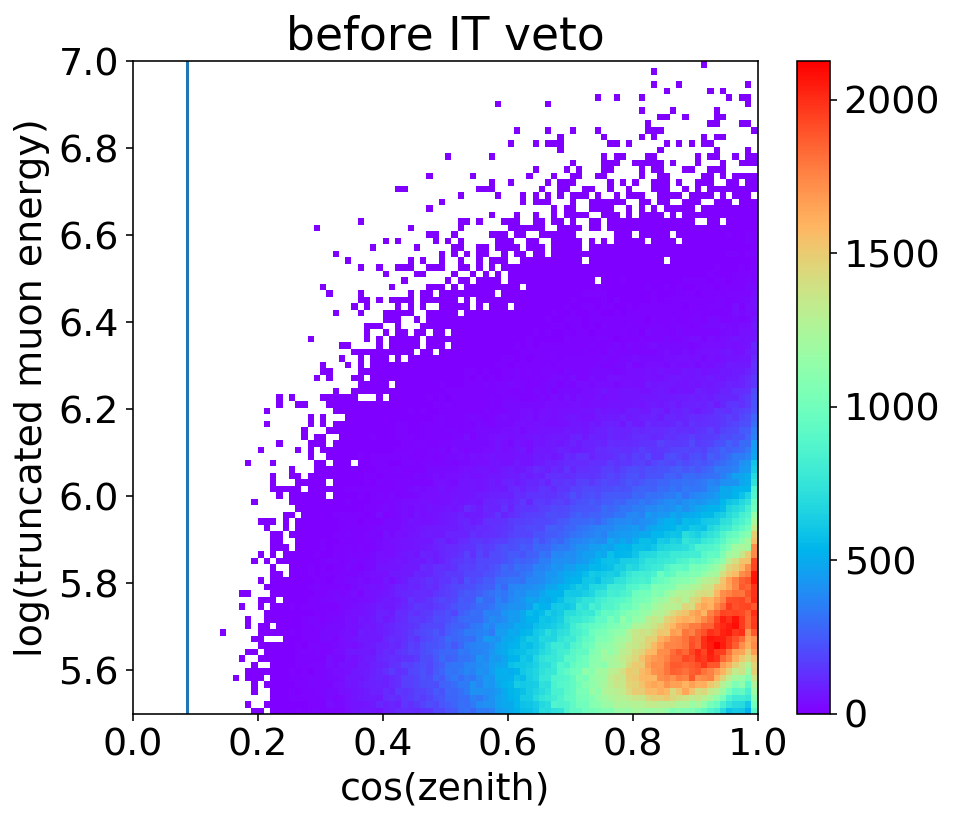

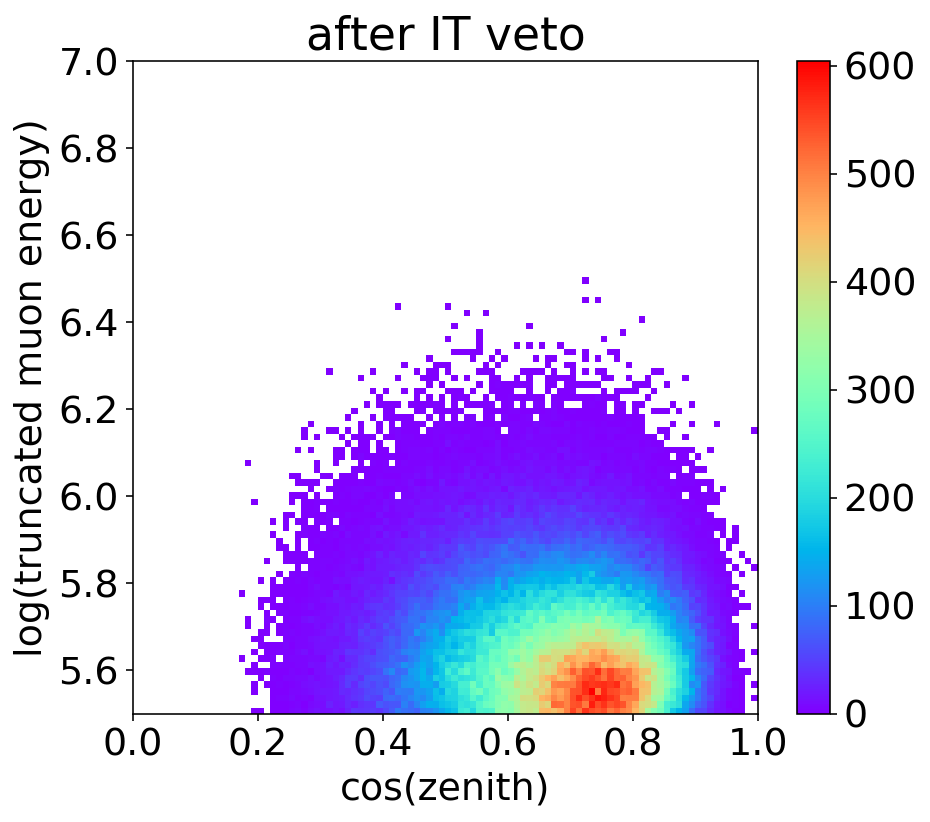

In [5]:
# zenith dependence?? 
" ----- energy vs zenith before and after IT veto ----- "
plt.rcParams.update({'font.size': 19})
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')

plt.figure(figsize=(7,6))
plt.hist2d(np.cos(zenith_data_burn),np.log10(truncated_muon_e_data_burn),bins=100,range=[[0,1],[5.5,7]],cmap=my_cmap,vmin=1e-19)

# -- low stat cut --
t = np.arange(0,2500,1)
lowstat = 5.47+2*np.sqrt(1 - ((t-20)/2210)**2)
plt.plot(t,lowstat,color='black')

plt.title('before IT veto')
plt.xlabel('cos(zenith)')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,1)
plt.ylim(5.5,7.)
plt.colorbar()
plt.axvline(np.cos(np.deg2rad(85)))

plt.figure(figsize=(7,6))
plt.hist2d(np.cos(zenith_data_burn)[passed_2],np.log10(truncated_muon_e_data_burn[passed_2]),bins=100,range=[[0,1],[5.5,7]],cmap=my_cmap,vmin=1e-19)
plt.plot(t,lowstat,color='black')
plt.xlabel('cos(zenith)')
plt.ylabel('log(truncated muon energy)')
plt.title('after IT veto')
plt.xlim(0,1)
plt.ylim(5.5,7.)
plt.colorbar()
plt.show()


/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


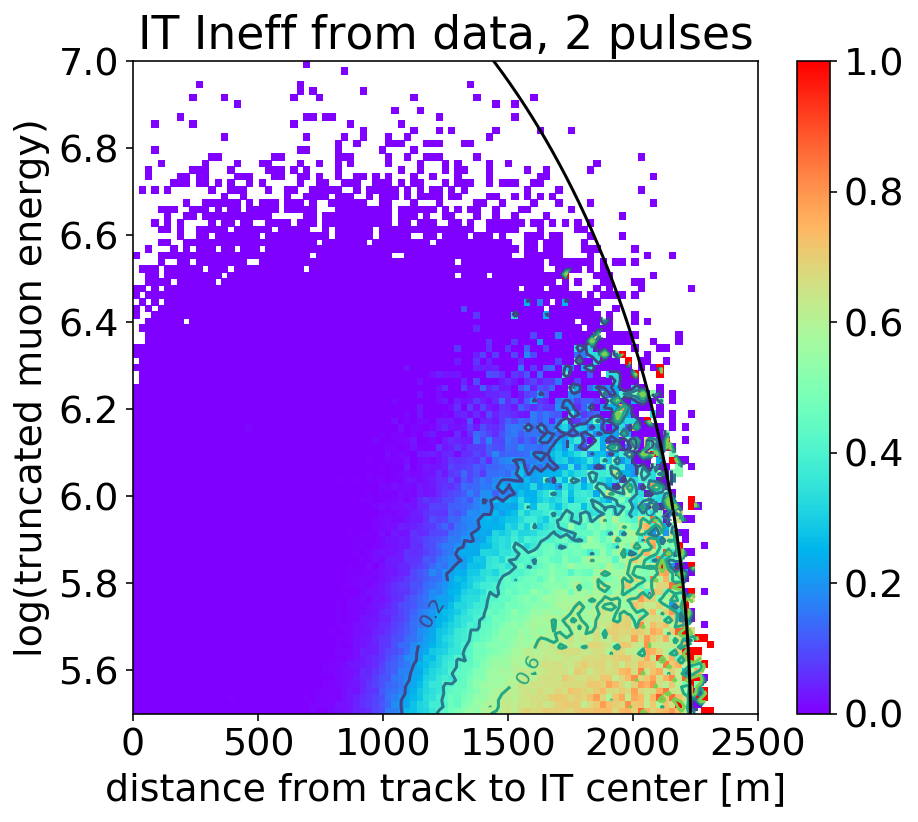

In [6]:
# alternative 
dist_bins = np.linspace(0,2500,100)
energy_bins = np.linspace(5.5,7,100)
h_before,x,y=np.histogram2d(d_to_IT_center_data_burn,np.log10(truncated_muon_e_data_burn),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
h_after,x,y=np.histogram2d(d_to_IT_center_data_burn[passed_2],np.log10(truncated_muon_e_data_burn)[passed_2],bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
ineff = (h_after/h_before).T

plt.figure(figsize=(7,6))
plt.plot(t,lowstat,color='black')
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')
# plt.hist2d(d,x,weights=ineff.ravel(),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
plt.pcolormesh(x,y,ineff,cmap=my_cmap)
plt.colorbar()
CS=plt.contour(ineff,extent=[0,2500,5.5,7],levels=[0.2,0.4,0.6,0.8])
plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
plt.clim(0,1)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,7)
plt.title('IT Ineff from data, 2 pulses')
plt.show()

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


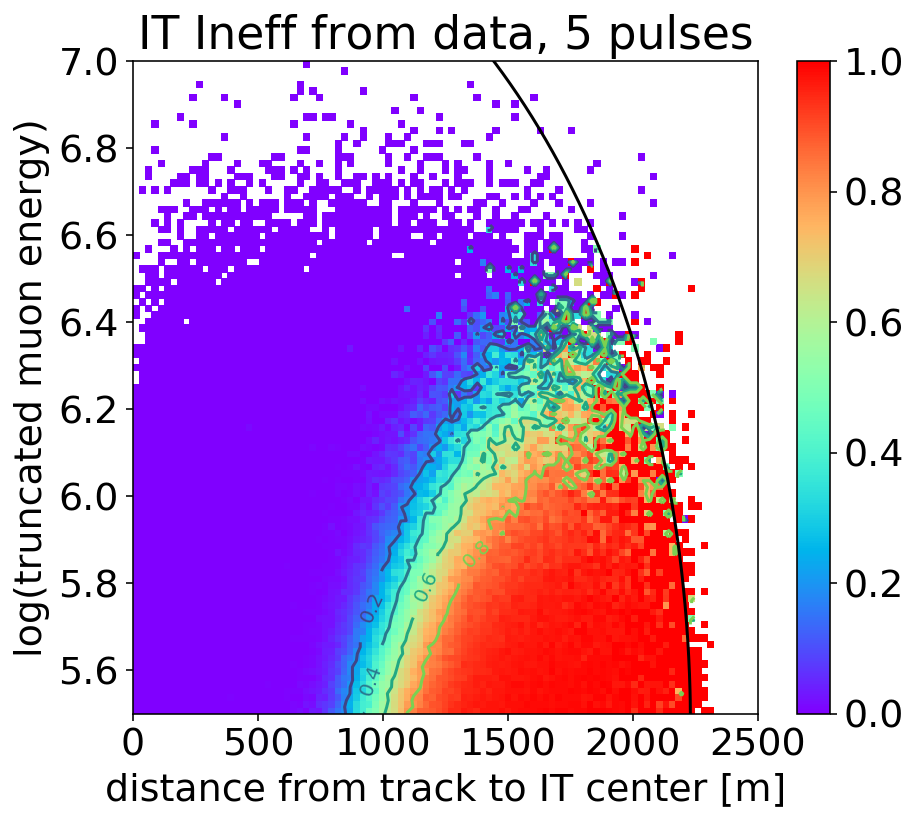

In [7]:
# alternative 
dist_bins = np.linspace(0,2500,100)
energy_bins = np.linspace(5.5,7,100)
h_before,x,y=np.histogram2d(d_to_IT_center_data_burn,np.log10(truncated_muon_e_data_burn),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
h_after,x,y=np.histogram2d(d_to_IT_center_data_burn[passed_5],np.log10(truncated_muon_e_data_burn)[passed_5],bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
ineff = (h_after/h_before).T

plt.figure(figsize=(7,6))
plt.plot(t,lowstat,color='black')
my_cmap = matplotlib.cm.get_cmap('rainbow')
my_cmap.set_under('w')
# plt.hist2d(d,x,weights=ineff.ravel(),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
plt.pcolormesh(x,y,ineff,cmap=my_cmap)
plt.colorbar()
CS=plt.contour(ineff,extent=[0,2500,5.5,7],levels=[0.2,0.4,0.6,0.8])
plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
plt.clim(0,1)
plt.xlabel('distance from track to IT center [m]')
plt.ylabel('log(truncated muon energy)')
plt.xlim(0,2500)
plt.ylim(5.5,7)
plt.title('IT Ineff from data, 5 pulses')
plt.show()

# modeling

In [14]:
def find_p(passed_n):
    dist_bins = np.linspace(0,2500,100)
    energy_bins = np.arange(5.5,6.2,0.1) # Tomasz's choice: array([5.8, 6. , 6.2, 6.4, 6.6, 6.8])
    
    expos = []
    devs = []
    for expo in np.arange(3,6.5,0.1):
        
        chisqr_n = [] # goodness of fit

        for b in range(0,len(energy_bins)-1): # in each energy range [e1,e2]

            # energy cut 
            CUT_energy_bin = (np.log10(truncated_muon_e_data_burn)>energy_bins[b])&(np.log10(truncated_muon_e_data_burn)<energy_bins[b+1])
            d_to_IT_center_binned = d_to_IT_center_data_burn[CUT_energy_bin]
            passed_n_binned = passed_n[CUT_energy_bin] # events that pass the veto (not rejected)

            h_total,dist_n = np.histogram(d_to_IT_center_binned,bins=dist_bins)
            h_pass,dist_n = np.histogram(d_to_IT_center_binned[passed_n_binned],bins=dist_bins)
            cut = (h_pass>0) & (h_total>0) # remove empty bins / all vetoed bins 
            dist_n = ((dist_n[1:] + dist_n[:-1])/2)[cut]
            ineff_n = (h_pass/h_total)[cut]
            ineff_n_err = (h_pass/h_total * np.sqrt(1/h_pass + 1/h_total))[cut]

            ##### fitting #####
            def ineff_model_npulse(x,a,b):
                return a * np.exp(-b/(x/2000)**(expo)) # asymptotic. Exponent depends on N pulse threshold! [4.5 for 2 pulse]

            p_init = [0.8, 0.05]    
            p_bounds = [[0,0],[1,1]]
            popt, pcov = curve_fit(ineff_model_npulse,dist_n,ineff_n,sigma=ineff_n_err,p0=p_init,bounds=p_bounds)

            chisqr_n = np.append( chisqr_n, 1/(len(ineff_n_err)-2)*np.sum( ((ineff_model_npulse(dist_n,*popt) - ineff_n)/ineff_n_err)**2 ))

        dev = np.sum((chisqr_n - 1)**2) # find total deviation from chisqr=1

        expos = np.append(expos, expo)
        devs = np.append(devs, dev)
    best = expos[devs == np.min(devs)]
    return expos,devs,best
    

In [15]:
e_2,d_2,b_2 = find_p(passed_2)
e_3,d_3,b_3 = find_p(passed_3)
e_4,d_4,b_4 = find_p(passed_4)
e_5,d_5,b_5 = find_p(passed_5)

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


[4.2] [4.8] [5.6] [6.2]


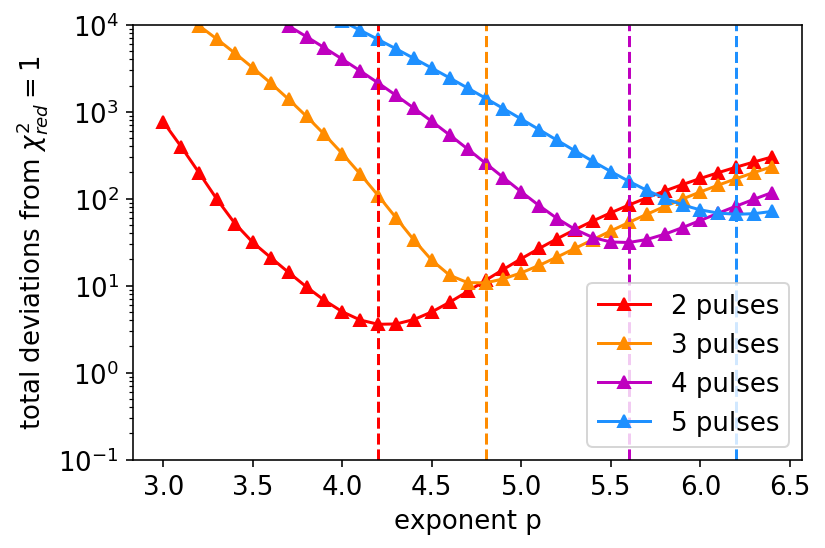

In [16]:
plt.plot(e_2,d_2,'^-',label='2 pulses',color='red')
plt.plot(e_3,d_3,'^-',label='3 pulses',color='darkorange')
plt.plot(e_4,d_4,'^-',label='4 pulses',color='m')
plt.plot(e_5,d_5,'^-',label='5 pulses',color='dodgerblue')
plt.axvline(b_2[0],ls='--',color='red')
plt.axvline(b_3[0],ls='--',color='darkorange')
plt.axvline(b_4[0],ls='--',color='m')
plt.axvline(b_5[0],ls='--',color='dodgerblue')
plt.xlabel('exponent p')
plt.ylabel(r'total deviations from $\chi^2_{red}=1$')
plt.legend()
plt.yscale('log')
plt.ylim(1e-1,1e4)
print(b_2,b_3,b_4,b_5)
plt.show()

In [23]:
" ===== 2. Constructing IT Ineff Model ===== " 

def modeling(passed_n,Npulse):
    dist_bins = np.linspace(0,2500,100)
    energy_bins = np.arange(5.5,6.3,0.1) 
    
    ' ----- 1. find best exponent p ----- '
    expos = []
    devs = []
    for expo in np.arange(3,6.6,0.1):
        chisqr_n = [] # goodness of fit
        for b in range(0,len(energy_bins)-1): # in each energy range [E1,E2]
            # energy cut 
            CUT_energy_bin = (np.log10(truncated_muon_e_data_burn)>energy_bins[b])&(np.log10(truncated_muon_e_data_burn)<energy_bins[b+1])
            d_to_IT_center_binned = d_to_IT_center_data_burn[CUT_energy_bin]
            passed_n_binned = passed_n[CUT_energy_bin] # events that pass the veto (not rejected)

            h_total,dist_n = np.histogram(d_to_IT_center_binned,bins=dist_bins)
            h_pass,dist_n = np.histogram(d_to_IT_center_binned[passed_n_binned],bins=dist_bins)
            cut = (h_pass>0) & (h_total>0) # remove empty bins / all vetoed bins 
            dist_n = ((dist_n[1:] + dist_n[:-1])/2)[cut]
            ineff_n = (h_pass/h_total)[cut]
            ineff_n_err = (h_pass/h_total * np.sqrt(1/h_pass + 1/h_total))[cut]

            def ineff_model_npulse(x,a,b):
                return a * np.exp(-b/(x/2000)**(expo)) # asymptotic. Exponent depends on N pulse threshold! [4.5 for 2 pulse]

            p_init = [0.8, 0.05]    
            p_bounds = [[0,0],[1,1]]
            popt, pcov = curve_fit(ineff_model_npulse,dist_n,ineff_n,sigma=ineff_n_err,p0=p_init,bounds=p_bounds)
            chisqr_n = np.append( chisqr_n, 1/(len(ineff_n_err)-2)*np.sum( ((ineff_model_npulse(dist_n,*popt) - ineff_n)/ineff_n_err)**2 ))

        dev = np.sum((chisqr_n - 1)**2) # find total deviation from chisqr=1

        expos = np.append(expos, expo)
        devs = np.append(devs, dev)
    best_expo = expos[devs == np.min(devs)][0]
    plt.plot(expos,devs,'o-')
    plt.yscale('log')
    print('best exponent = ',str(best_expo))
    
    ' ----- 2. start fitting as a function of distance -----'
    # store params for each energy bin 
    energy_coord = []
    param_passed_n_a = [] 
    param_passed_n_a_err = []
    param_passed_n_b = [] 
    param_passed_n_b_err = []
    chisqr_n = [] # goodness of fit

    for b in range(0,len(energy_bins)-1): # in each energy range [e1,e2]

        # energy cut 
        CUT_energy_bin = (np.log10(truncated_muon_e_data_burn)>energy_bins[b])&(np.log10(truncated_muon_e_data_burn)<energy_bins[b+1])
        d_to_IT_center_binned = d_to_IT_center_data_burn[CUT_energy_bin]
        passed_n_binned = passed_n[CUT_energy_bin] # events that pass the veto (not rejected)

        h_total,dist_n = np.histogram(d_to_IT_center_binned,bins=dist_bins)
        h_pass,dist_n = np.histogram(d_to_IT_center_binned[passed_n_binned],bins=dist_bins)
        cut = (h_pass>0) & (h_total>0) # remove empty bins / all vetoed bins 
        dist_n = ((dist_n[1:] + dist_n[:-1])/2)[cut]
        ineff_n = (h_pass/h_total)[cut]
        ineff_n_err = (h_pass/h_total * np.sqrt(1/h_pass + 1/h_total))[cut]

        ##### fitting #####
        def ineff_model_npulse(x,a,b):
            return a * np.exp(-b/(x/2000)**(best_expo)) # asymptotic. Exponent depends on N pulse threshold! [4.5 for 2 pulse]

        p_init = [0.8, 0.05]    
        p_bounds = [[0,0],[1,1]]
        popt, pcov = curve_fit(ineff_model_npulse,dist_n,ineff_n,sigma=ineff_n_err,p0=p_init,bounds=p_bounds)

        # for energy fitting 
        energy_coord = np.append(energy_coord, (energy_bins[b]+energy_bins[b+1])/2)

        param_passed_n_a = np.append(param_passed_n_a,popt[0])
        param_passed_n_a_err = np.append(param_passed_n_a_err,np.sqrt(pcov[0,0]))
        param_passed_n_b = np.append(param_passed_n_b,popt[1])
        param_passed_n_b_err = np.append(param_passed_n_b_err,np.sqrt(pcov[1,1]))

        # compute chi2 goodness of fit for later (reduced chi2)
        chisqr_n = np.append( chisqr_n, 1/(len(ineff_n_err)-2)*np.sum( ((ineff_model_npulse(dist_n,*popt) - ineff_n)/ineff_n_err)**2 ))

        " ----- plot ineff vs. dist ----- "

        plt.rcParams.update({'font.size': 13})
        plt.figure(figsize=(14,5))

        plt.subplot(121)
        plt.axhline(0,ls='--',color='black',alpha=0.8)
        plt.axhline(1,ls='--',color='black',alpha=0.8)

        plt.errorbar(dist_n,ineff_n,yerr=ineff_n_err,fmt='s',alpha=0.5,label=str(Npulse)+' pulses, '+r'$\chi^2_{fit}=$'+str(np.round(chisqr_n[b],2)),color='steelblue')

        dist_dense = np.arange(0,2500,10)
        plt.plot(dist_dense,ineff_model_npulse(dist_dense,*popt),'--',lw=3,color='darkorange')

        plt.xlabel('distance from track to IT center [m]')
        plt.ylabel('IT Ineff')
        plt.xlim(0,2500)
        plt.ylim(-0.05,1.1)
        plt.title(r'$\log_{10}$E$\in$['+str(np.round(energy_bins[b],2))+', '+str(np.round(energy_bins[b+1],2))+']')
        plt.legend(loc='upper left',prop={'size': 9})

        plt.subplot(122)
        plt.axhline(0,ls='--',color='black',alpha=0.8)
        plt.axhline(1,ls='--',color='black',alpha=0.8)

        plt.errorbar(dist_n,ineff_n,yerr=ineff_n_err,fmt='s',alpha=0.5,label=str(Npulse)+' pulses, '+r'$\chi^2_{fit}=$'+str(np.round(chisqr_n[b],2)),color='steelblue')

        dist_dense = np.arange(0,2500,10)
        plt.plot(dist_dense,ineff_model_npulse(dist_dense,*popt),'--',lw=3,color='darkorange')

        plt.xlabel('distance from track to IT center [m]')
        plt.ylabel('log10 IT Ineff')
        plt.xlim(0,2500)
        plt.ylim(2*1e-4,2)
        plt.title(r'$\log_{10}$E$\in$['+str(np.round(energy_bins[b],2))+', '+str(np.round(energy_bins[b+1],2))+']')
        plt.legend(loc='lower right',prop={'size': 9})
        plt.yscale('log')

        plt.show()
        
    '----- 3. plot goodness of fit -----'
    
    plt.figure()
    plt.plot(energy_coord,chisqr_n,'o-',color='m')
    plt.xlabel('energy bin')
    plt.ylabel(r'$\chi^2_{red}$')
    plt.title('goodness of fit, '+str(Npulse)+' pulses')
    plt.ylim(0,10)
    plt.show()
    
    '----- 4. energy fitting -----' 
    
    def e_func(x,c,d,e): # polynomial
        return c*(x-d)**2 + e
    p_bounds = [[-10,4,0],[10,5.47,20]]

    popt_a, pcov_a = curve_fit(e_func,energy_coord,param_passed_n_a,sigma=param_passed_n_a_err,bounds=p_bounds)
    popt_b, pcov_b = curve_fit(e_func,energy_coord,param_passed_n_b,sigma=param_passed_n_b_err,bounds=p_bounds)

    print(popt_a)

    plt.figure(figsize=(15,5))

    # param a(c,d,e)
    plt.subplot(121)
    plt.errorbar(energy_coord,param_passed_n_a,yerr=param_passed_n_a_err,fmt='s',alpha=0.5,color='m',label=str(Npulse)+' pulses')
    energy_coord_dense = np.arange(5,8,0.1)
    plt.plot(energy_coord_dense,e_func(energy_coord_dense,*popt_a),'--',color='red')
    plt.xlim(5.5,7)
    plt.ylim(0.,1.1)
    plt.legend()
    plt.xlabel(r'$\log_{10}$ truncated muon energy')
    plt.ylabel('parameter a(E)')

    # param b(c,d,e)
    plt.subplot(122)
    plt.errorbar(energy_coord,param_passed_n_b,yerr=param_passed_n_b_err,fmt='s',alpha=0.5,color='m',label=str(Npulse)+' pulses')
    plt.plot(energy_coord_dense,e_func(energy_coord_dense,*popt_b),'--',color='red')
    plt.xlim(5.5,7)
    plt.ylim(-0.1,0.8)
    plt.legend()
    plt.xlabel(r'$\log_{10}$ truncated muon energy')
    plt.ylabel('parameter b(E)')

    plt.show()
    
    " ----- Save IT Ineff Model ----- "

    # f = ineff(dist,A,B,C) where A = e_func(Energy,C,D,E), etc
    def IT_model(dist,E,poptx_a,poptx_b): 
        A = e_func(E,*poptx_a)
        B = e_func(E,*poptx_b)
        return ineff_model_npulse(dist,A,B)

    # SAVING 2 pulses model parameters to file!! 
    model_file = open('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/1_distribution_plots/IT_model_robust_'+str(Npulse)+'.txt','w')
    L = [str(popt_a[0])+'\n',str(popt_a[1])+'\n',str(popt_a[2])+'\n',
         str(popt_b[0])+'\n',str(popt_b[1])+'\n',str(popt_b[2])+'\n', 
        ]
    model_file.writelines(L) 
    model_file.close()

    # 2d pcolor with contour  

    xt = np.linspace(0.001,2500,100) # dist 
    yt = np.linspace(5.5,7,100)  # E 
    xg,yg = np.meshgrid(xt,yt)
    zg = IT_model(xg,yg,popt_a,popt_b)

    # if ineff < 0, change to 0! 
    zg[zg<0] = 0

    ##### data model comparison

    dist_bins = np.linspace(0,2500,100)
    energy_bins = np.linspace(5.5,7,100)
    
    plt.figure(figsize=(20,7))
    plt.subplot(121)
    
    plt.plot(t,lowstat,color='black')
    h_before,x,y=np.histogram2d(d_to_IT_center_data_burn,np.log10(truncated_muon_e_data_burn),bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
    h_after,x,y=np.histogram2d(d_to_IT_center_data_burn[passed_n],np.log10(truncated_muon_e_data_burn)[passed_n],bins=[dist_bins,energy_bins],range=([[0,2500],[5.5,7]]))
    ineff = (h_after/h_before).T

    plt.plot(t,lowstat,color='black')
    my_cmap = matplotlib.cm.get_cmap('rainbow')
    my_cmap.set_under('w')
    plt.pcolormesh(x,y,ineff,cmap=my_cmap)
    plt.colorbar()
    CS=plt.contour(ineff,extent=[0,2500,5.5,7],levels=[0.2,0.4,0.6,0.8])
    plt.clabel(CS,inline=1,fmt='%1.1f',fontsize=10)
    plt.clim(0,1)
    plt.xlabel('distance from track to IT center [m]')
    plt.ylabel('log(truncated muon energy)')
    plt.xlim(0,2500)
    plt.ylim(5.5,7)
    plt.title('IT Ineff from data, '+str(Npulse)+' pulses')
    
    plt.subplot(122)

    plt.plot(t,lowstat,color='black')
    plt.pcolormesh(xg,yg,zg,cmap='rainbow',shading='flat')
    plt.colorbar()
    plt.clim(0,1)
    CS=plt.contour(xg,yg,zg,levels=[0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
    plt.clabel(CS,inline=1,fmt='%1.3f',fontsize=10)

    plt.xlabel('distance from track to IT center [m]')
    plt.ylabel('log(truncated muon energy)')
    plt.xlim(0,2500)
    plt.ylim(5.5,7)
    plt.title('IT Inefficiency Model using '+str(Npulse)+' pulses')

    plt.show()

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


best exponent =  4.200000000000001


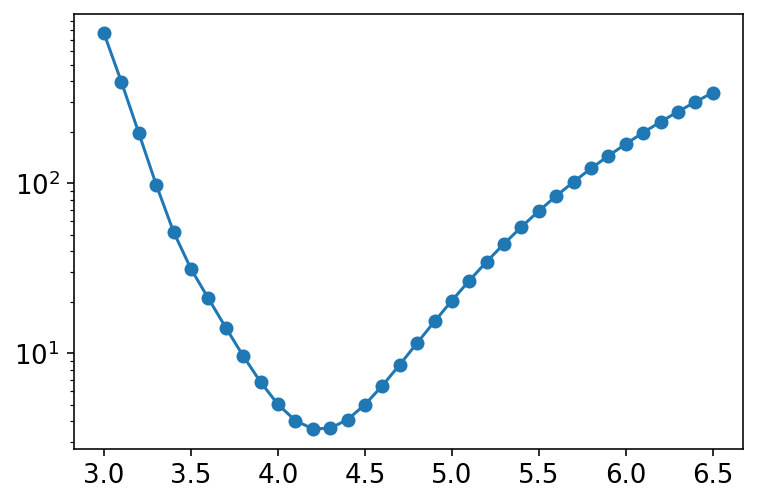

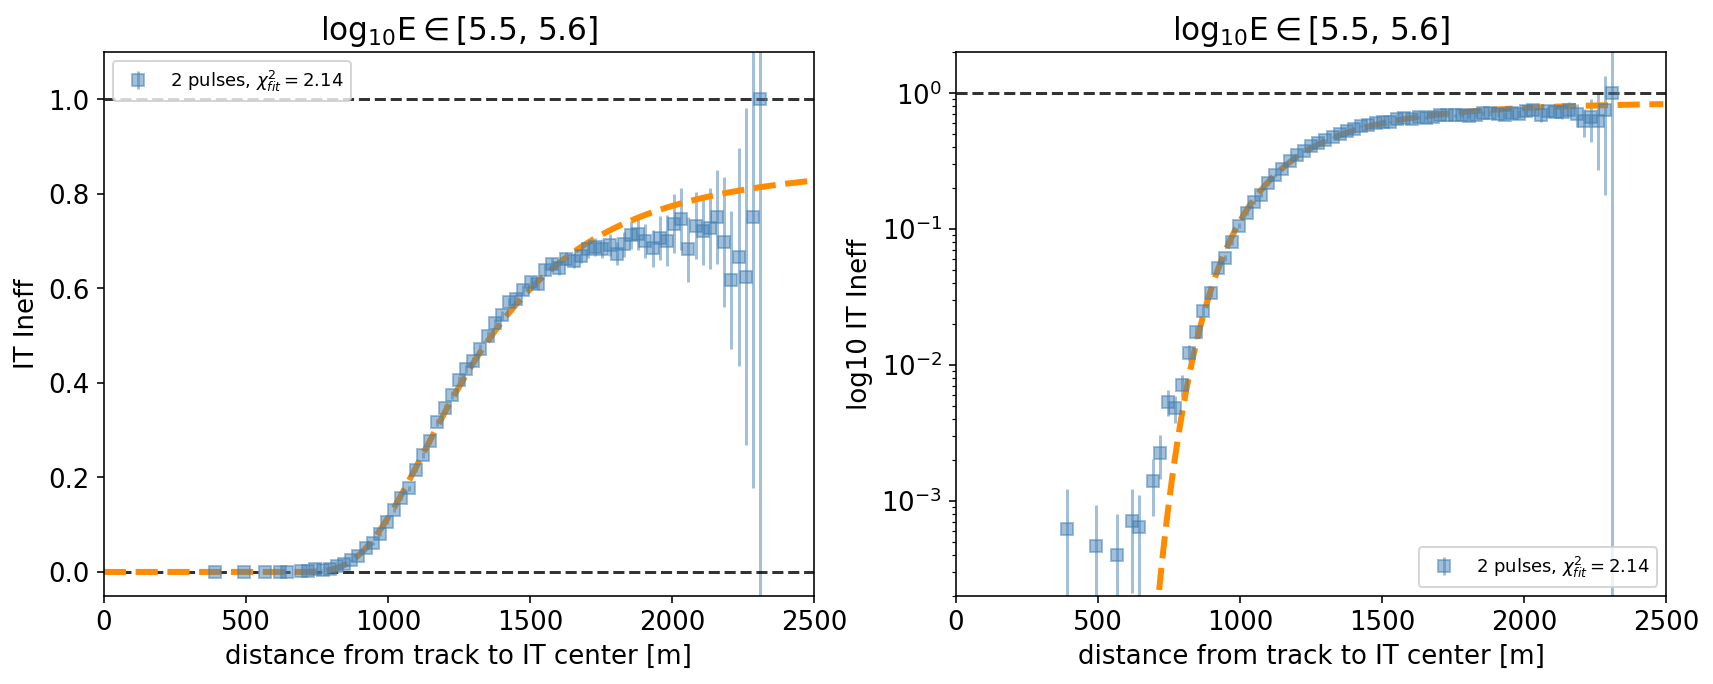

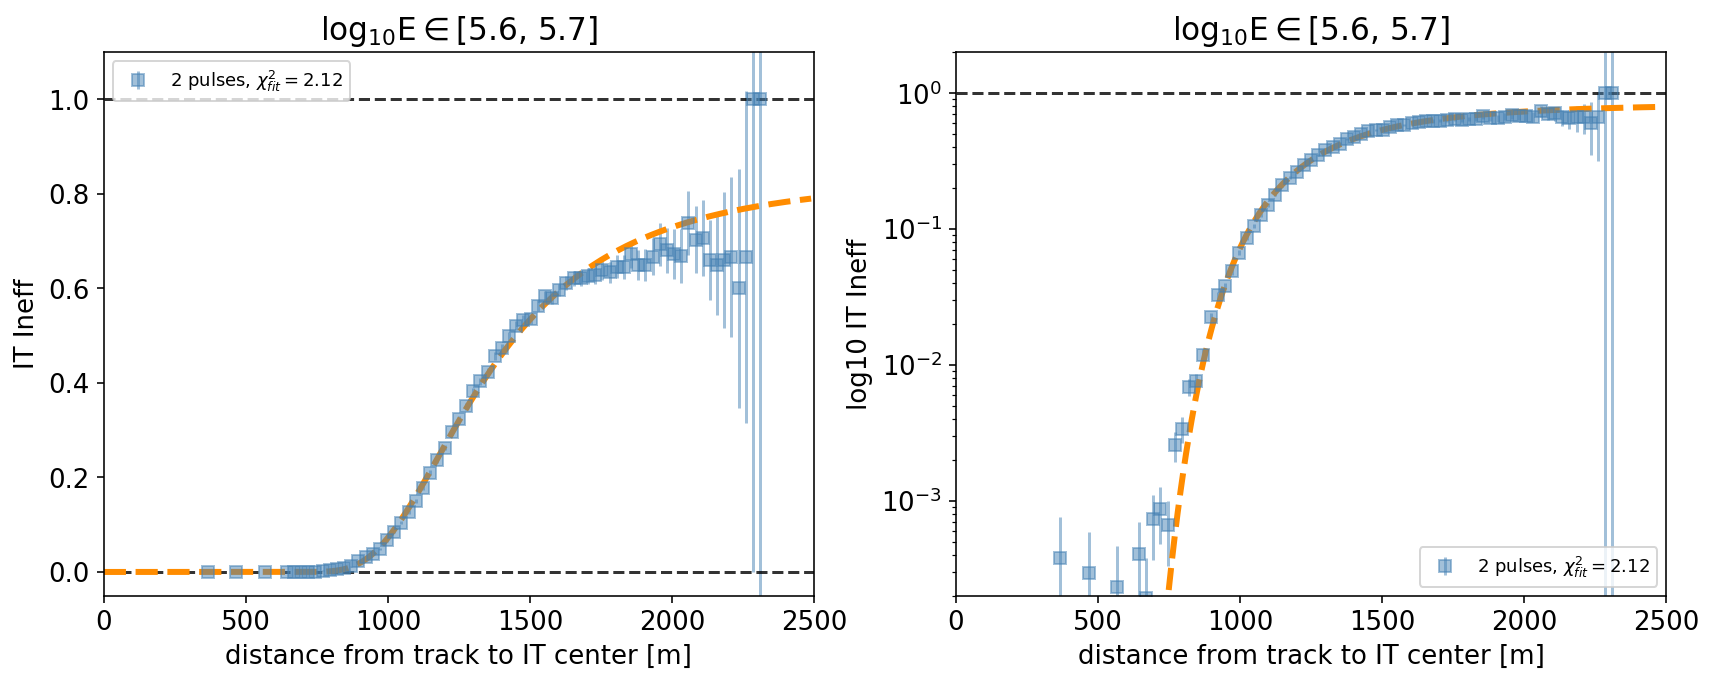

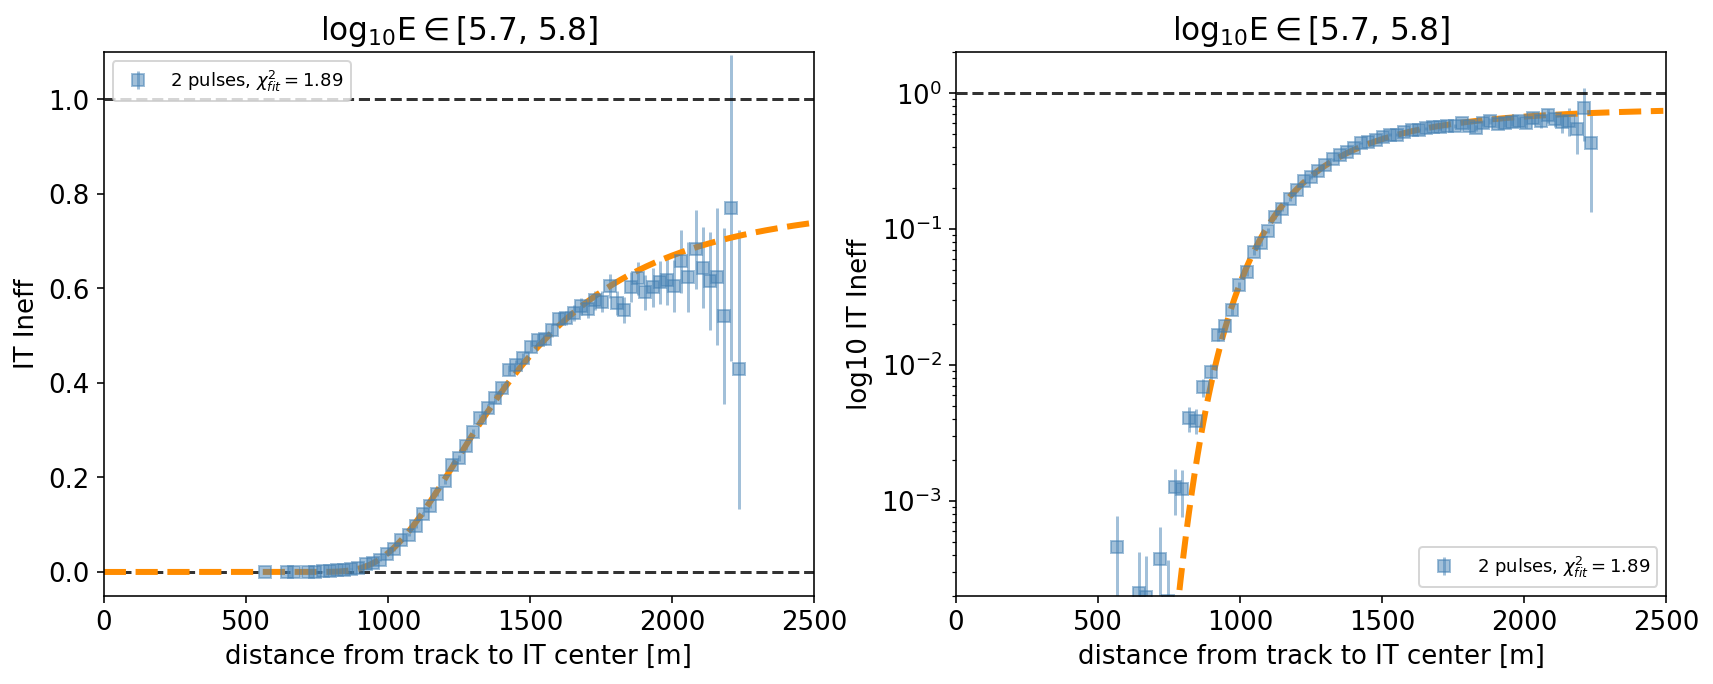

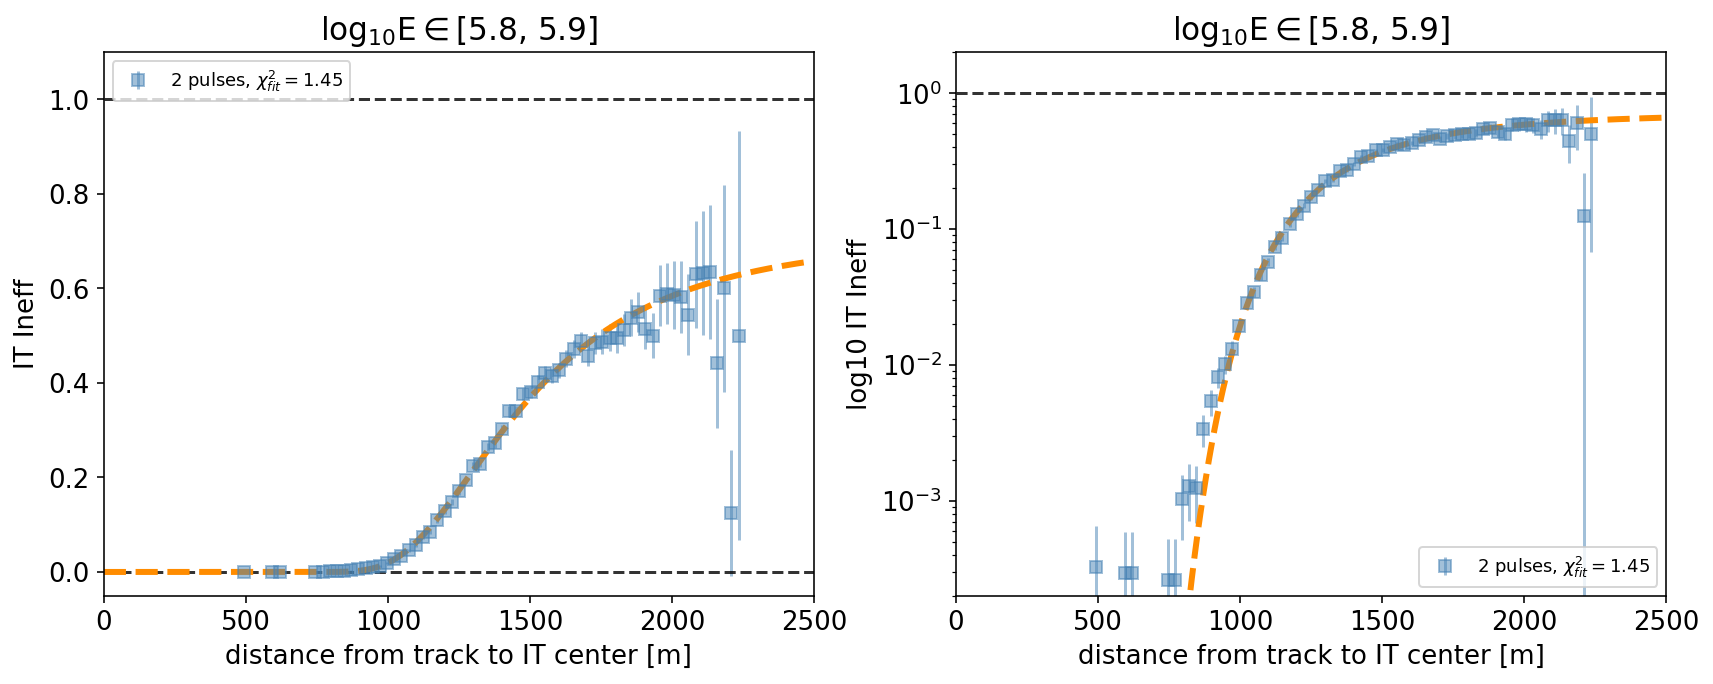

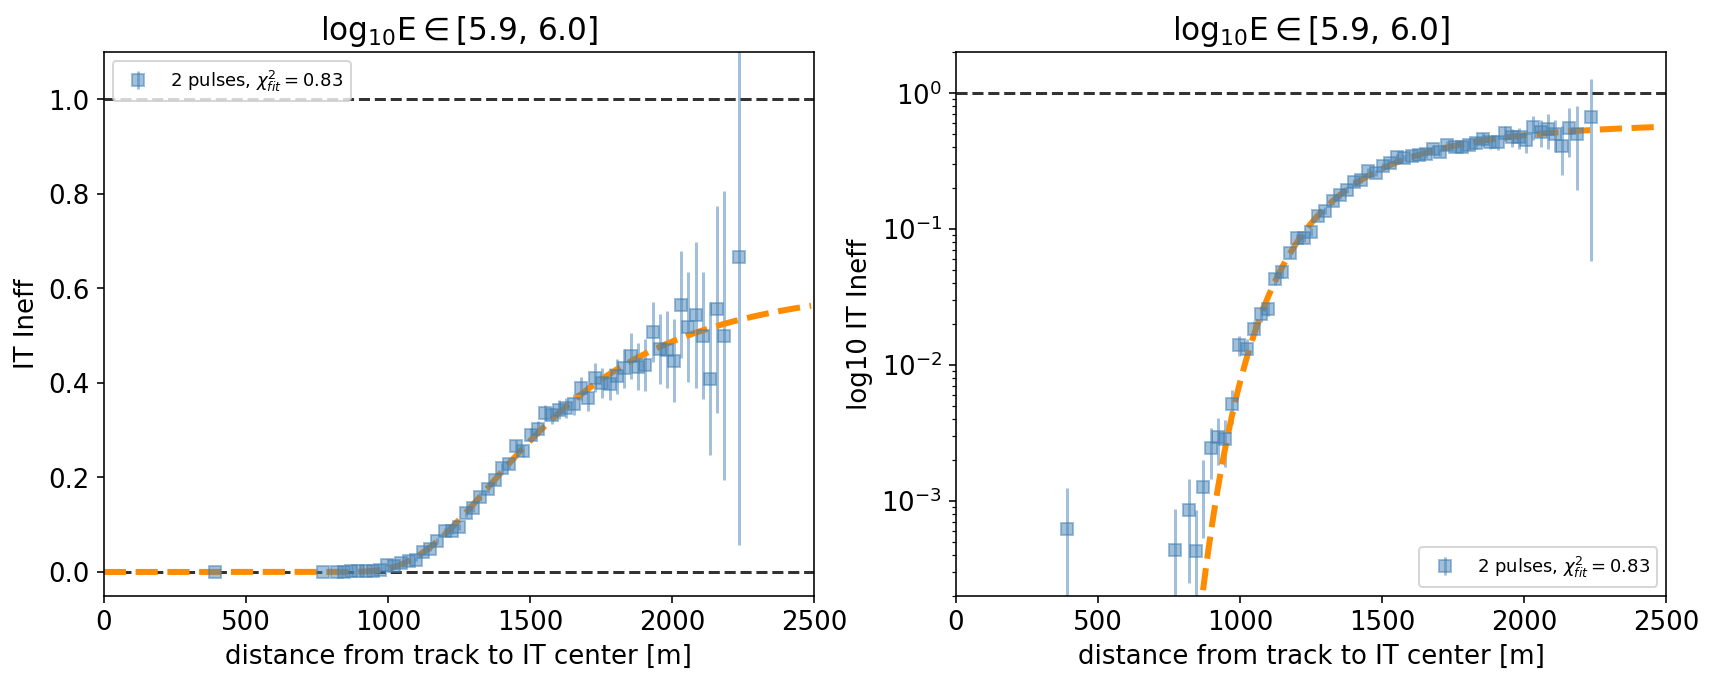

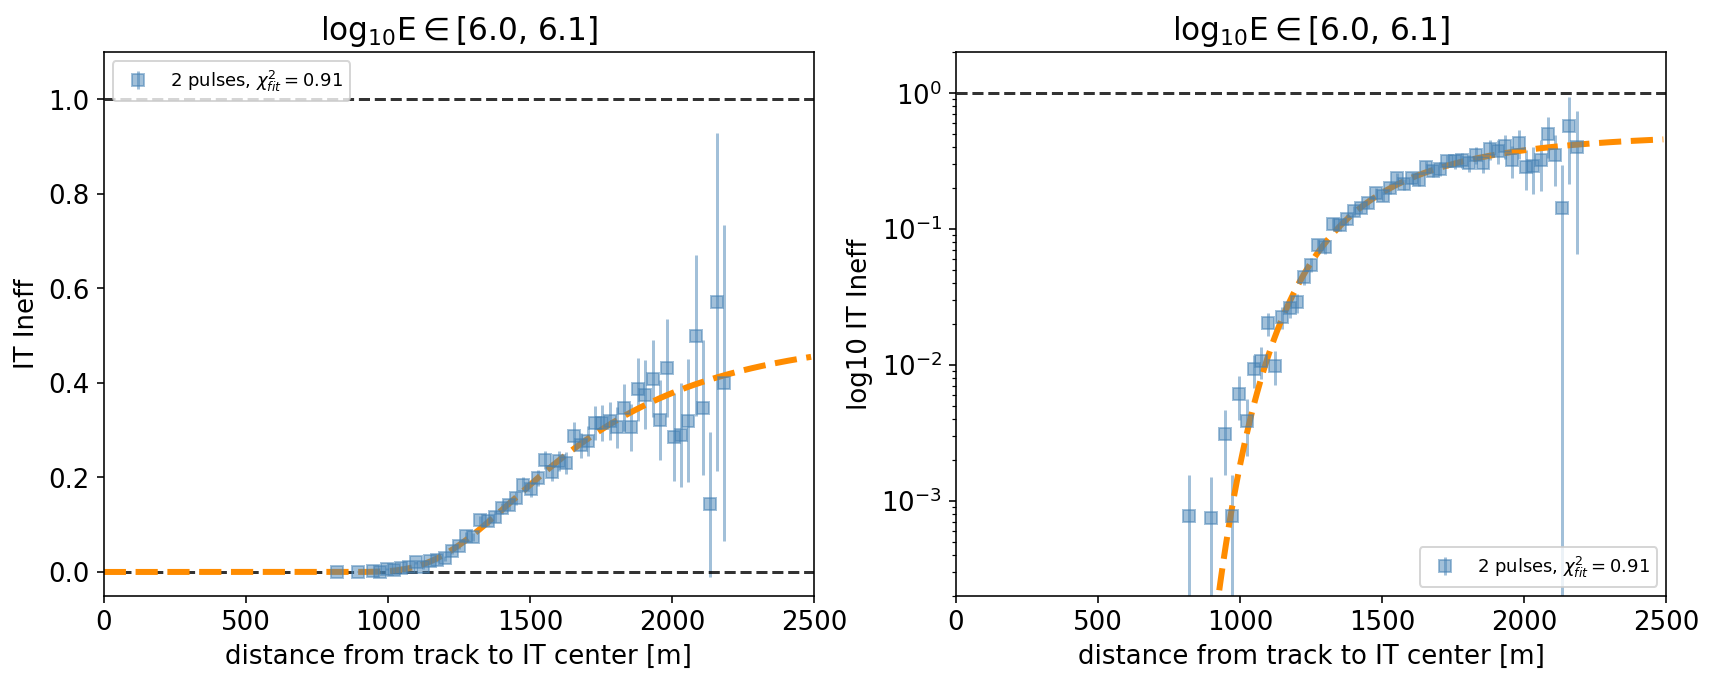

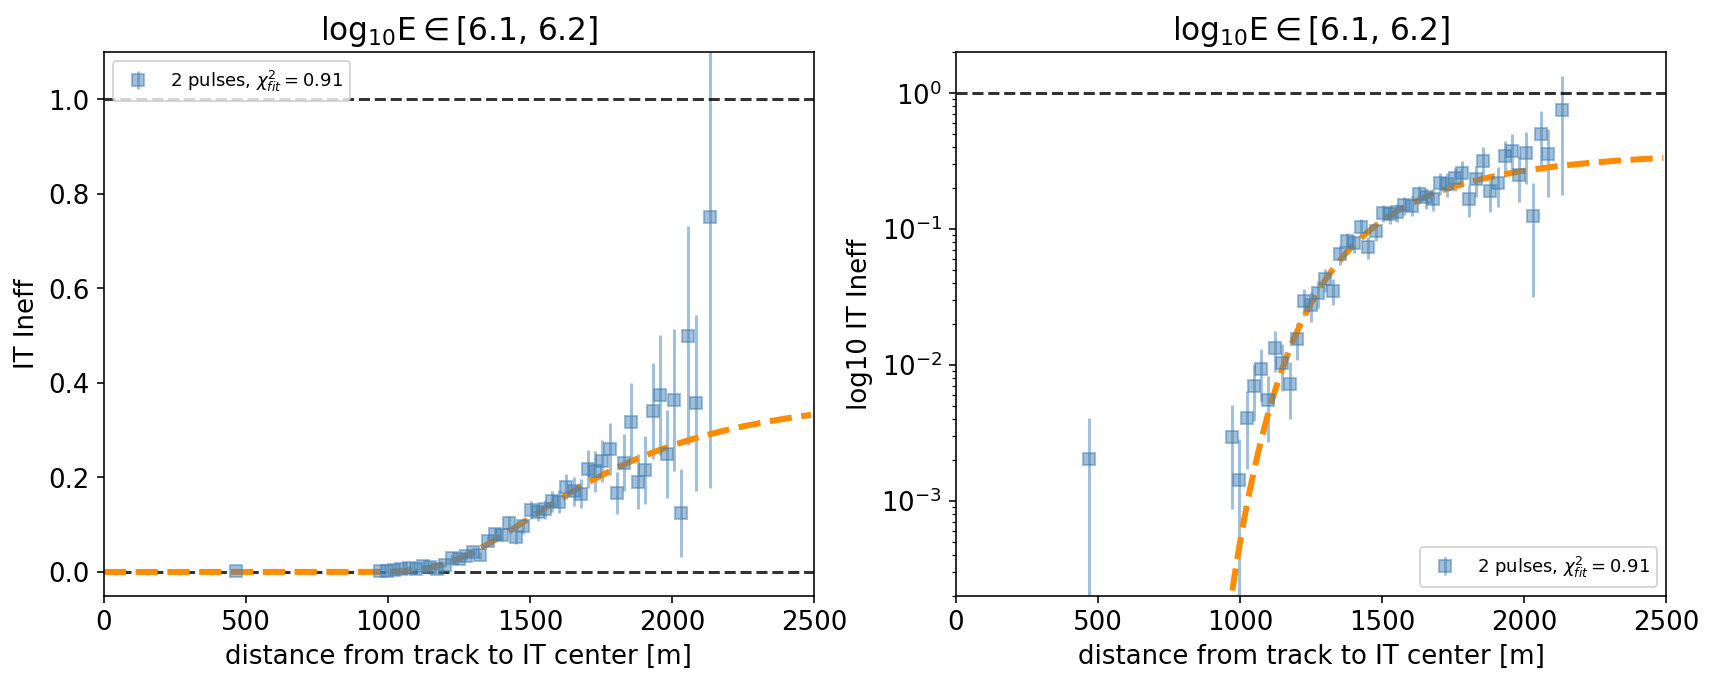

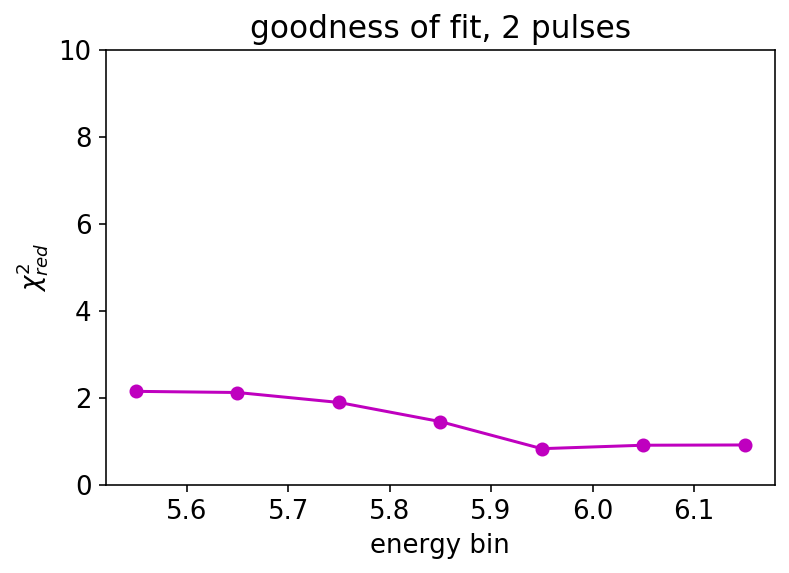

[-0.99642262  5.44617387  0.87530508]


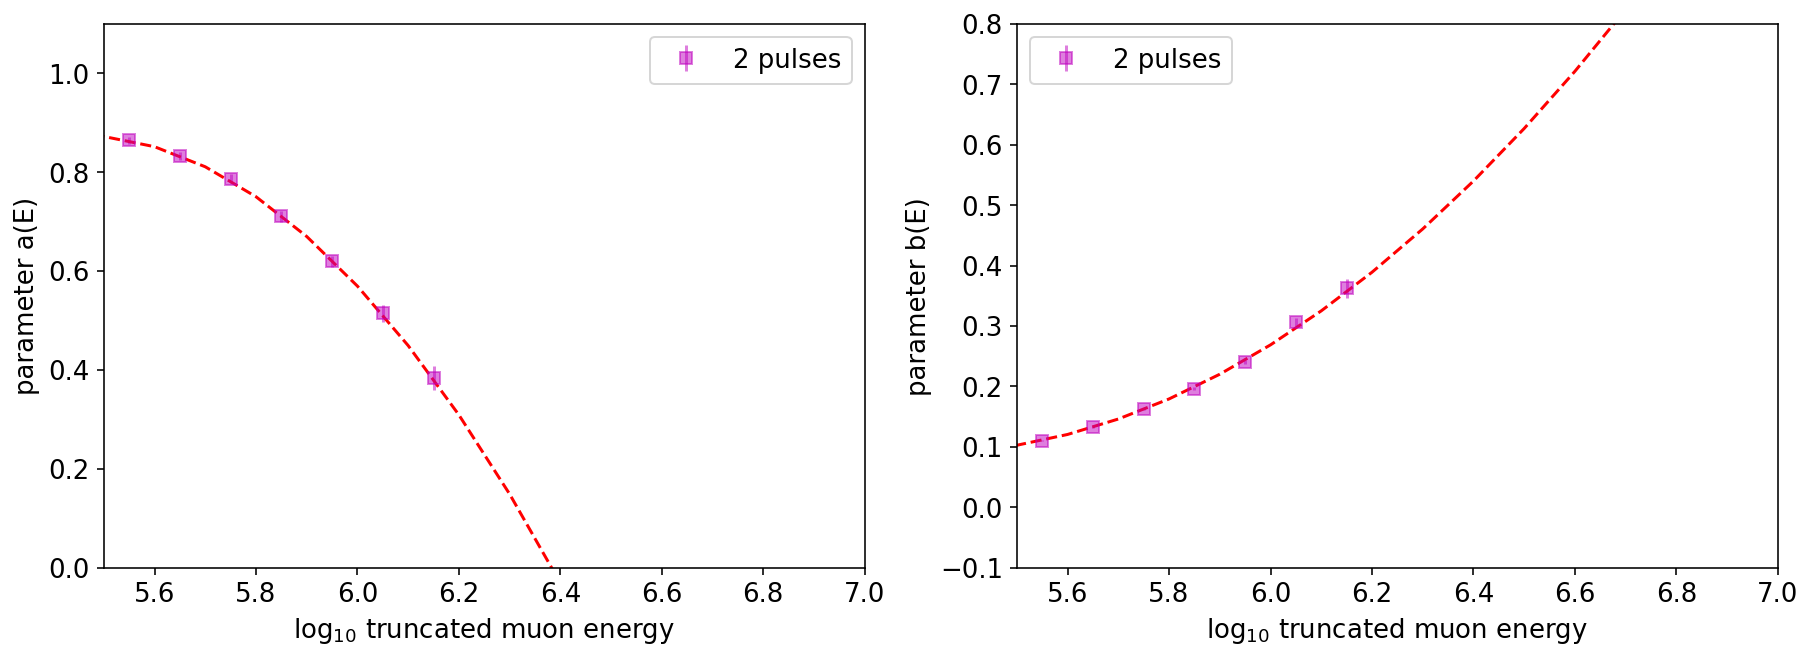

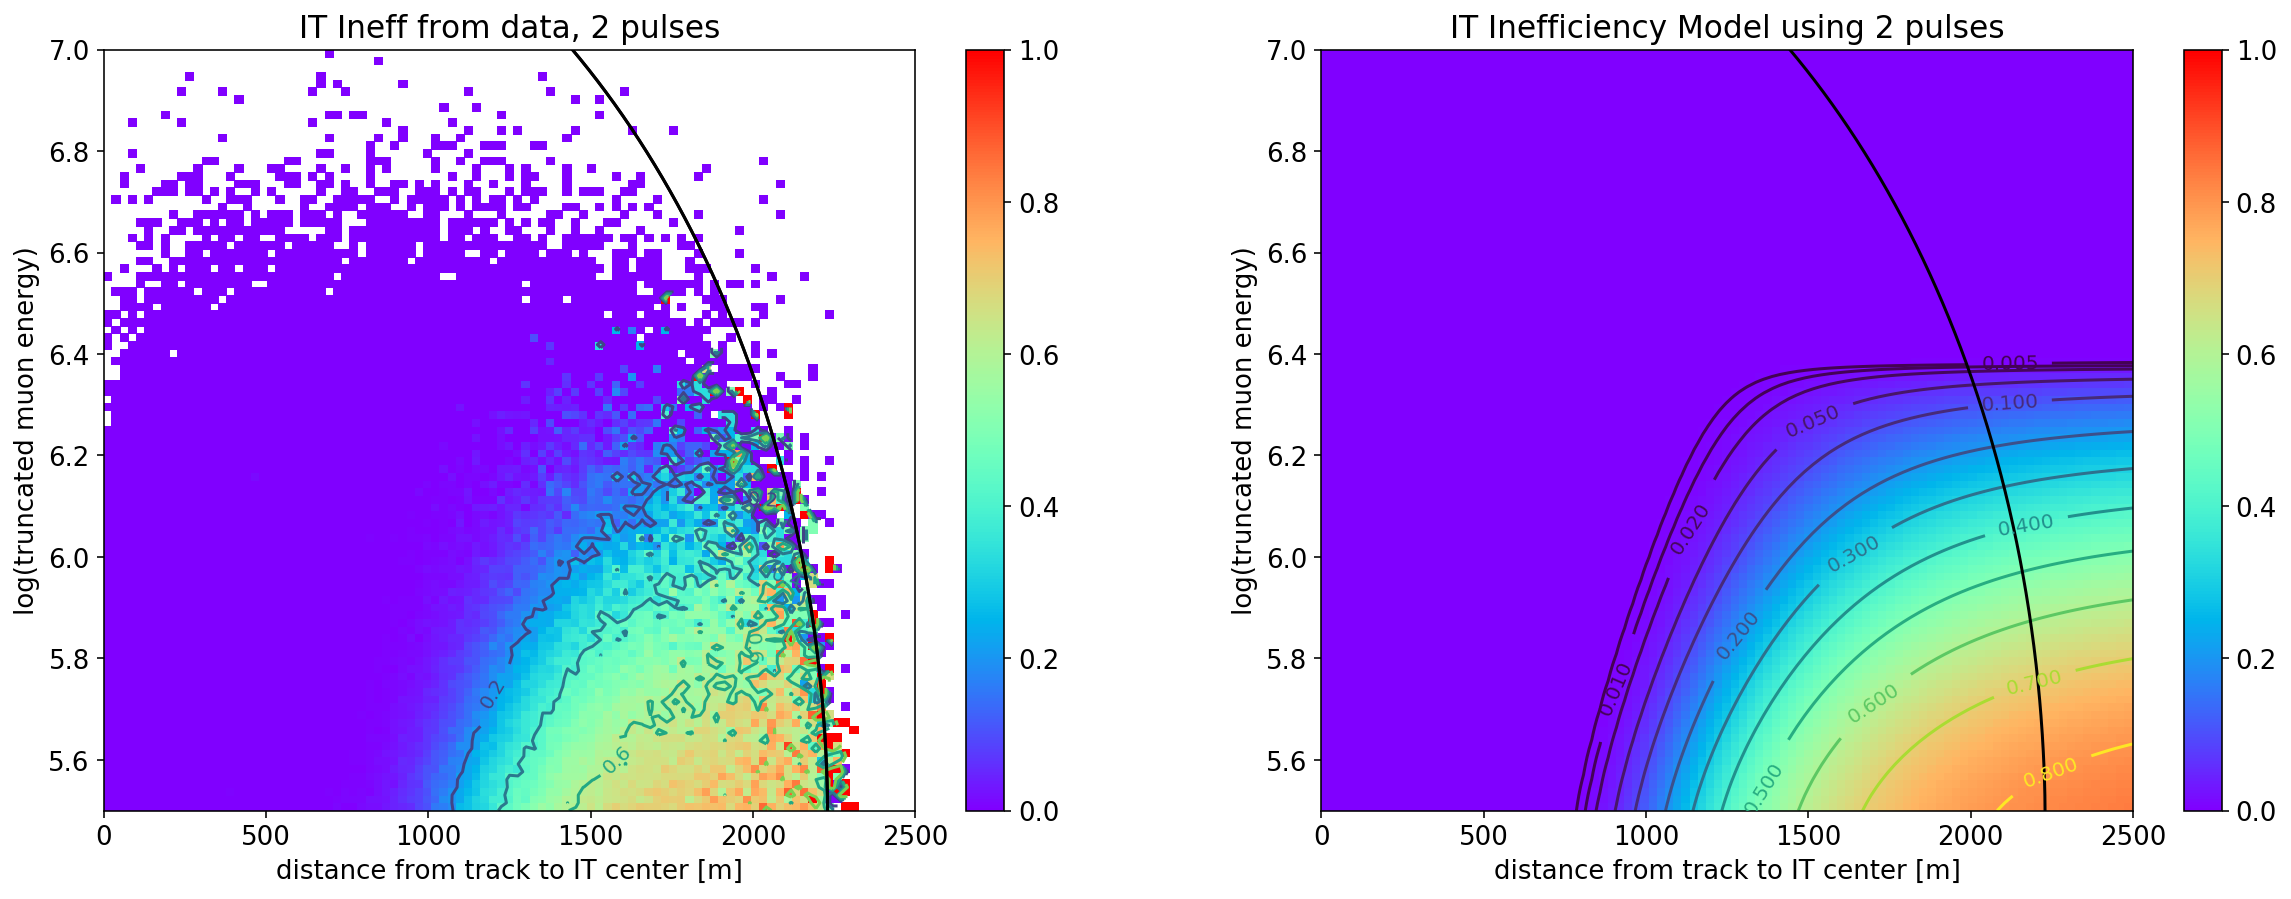

In [24]:
modeling(passed_2,2)

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


best exponent =  5.900000000000002


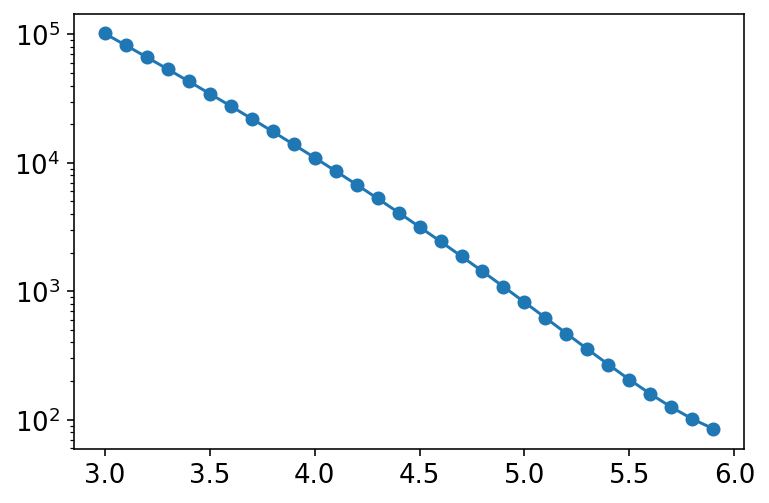

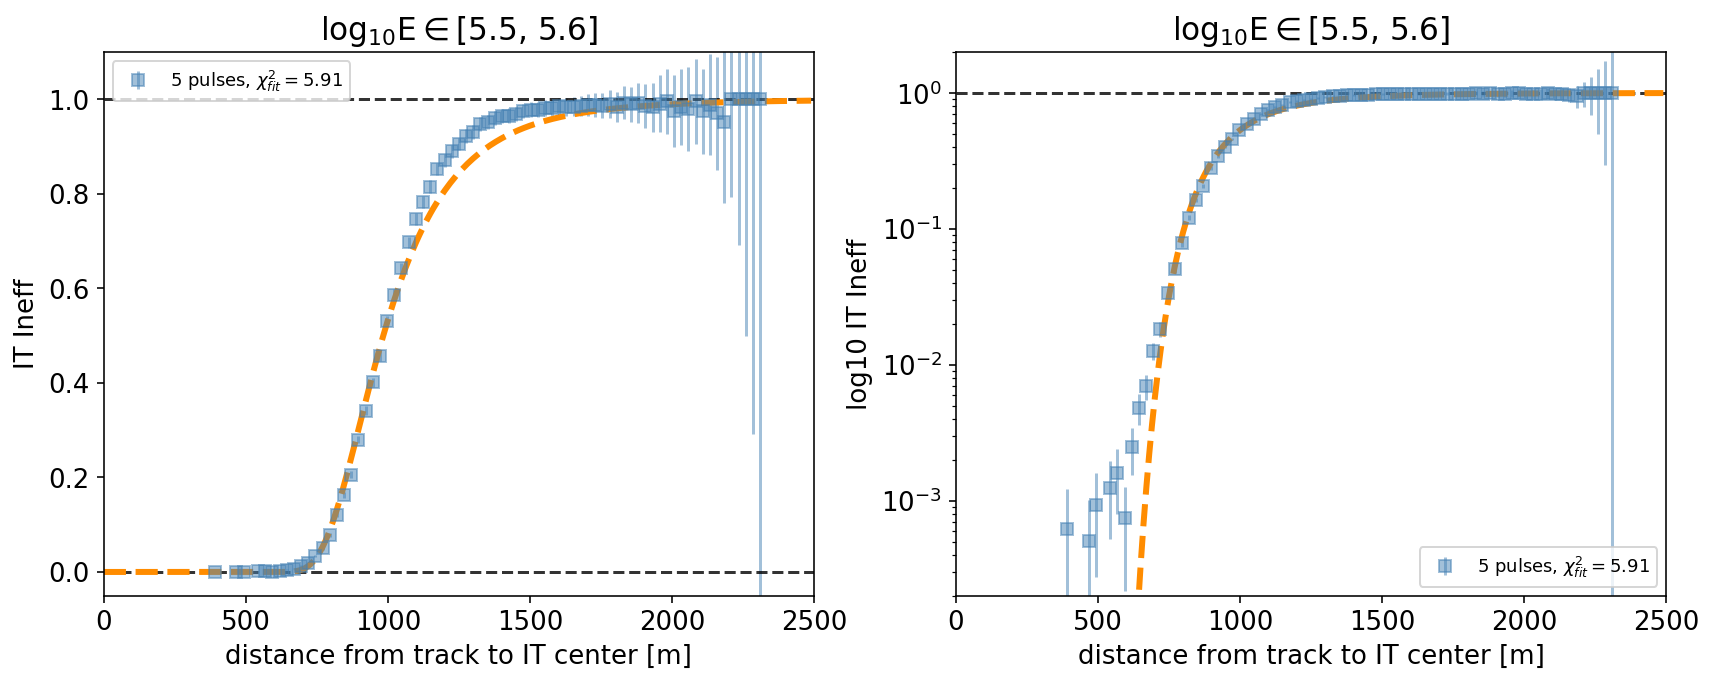

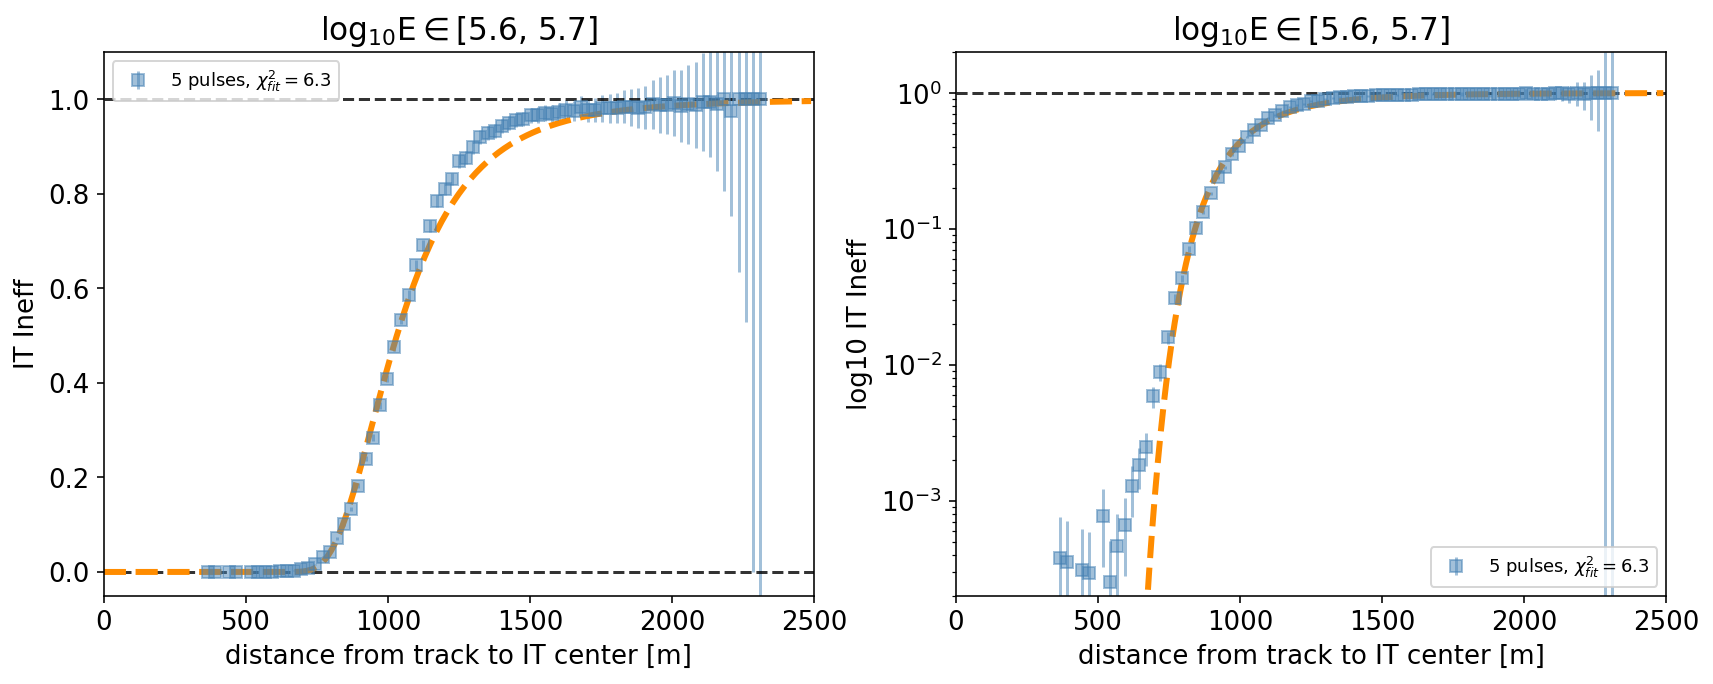

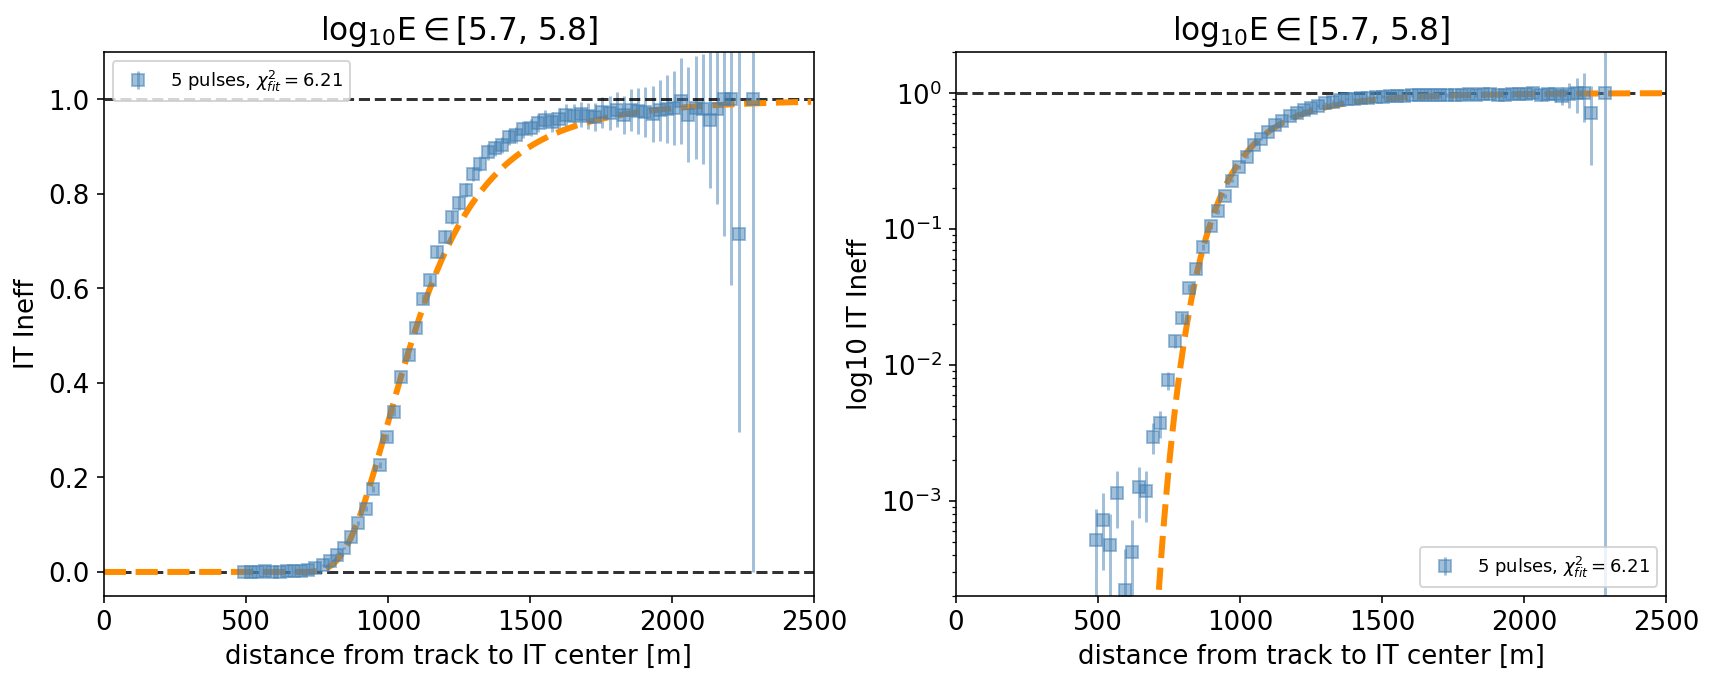

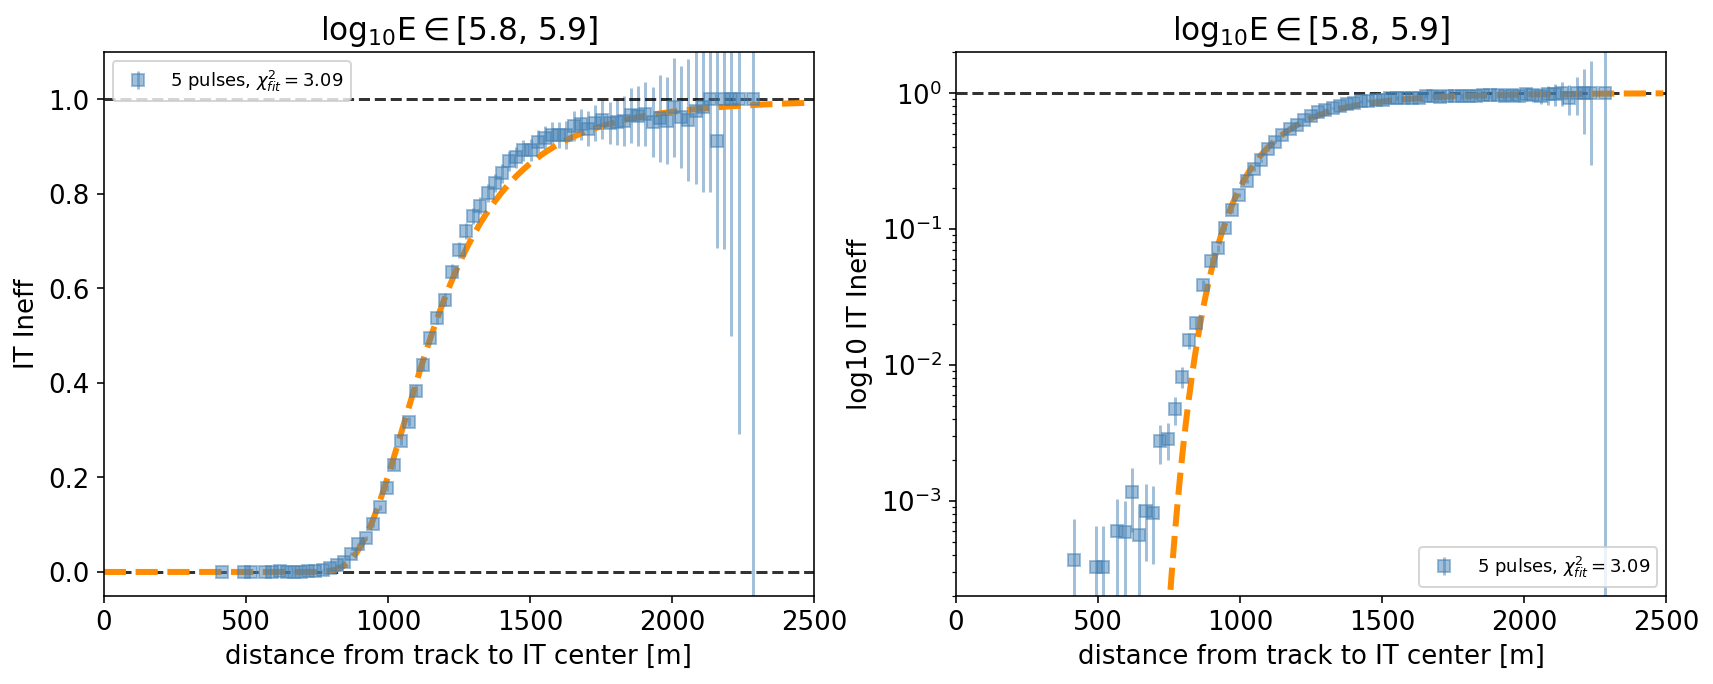

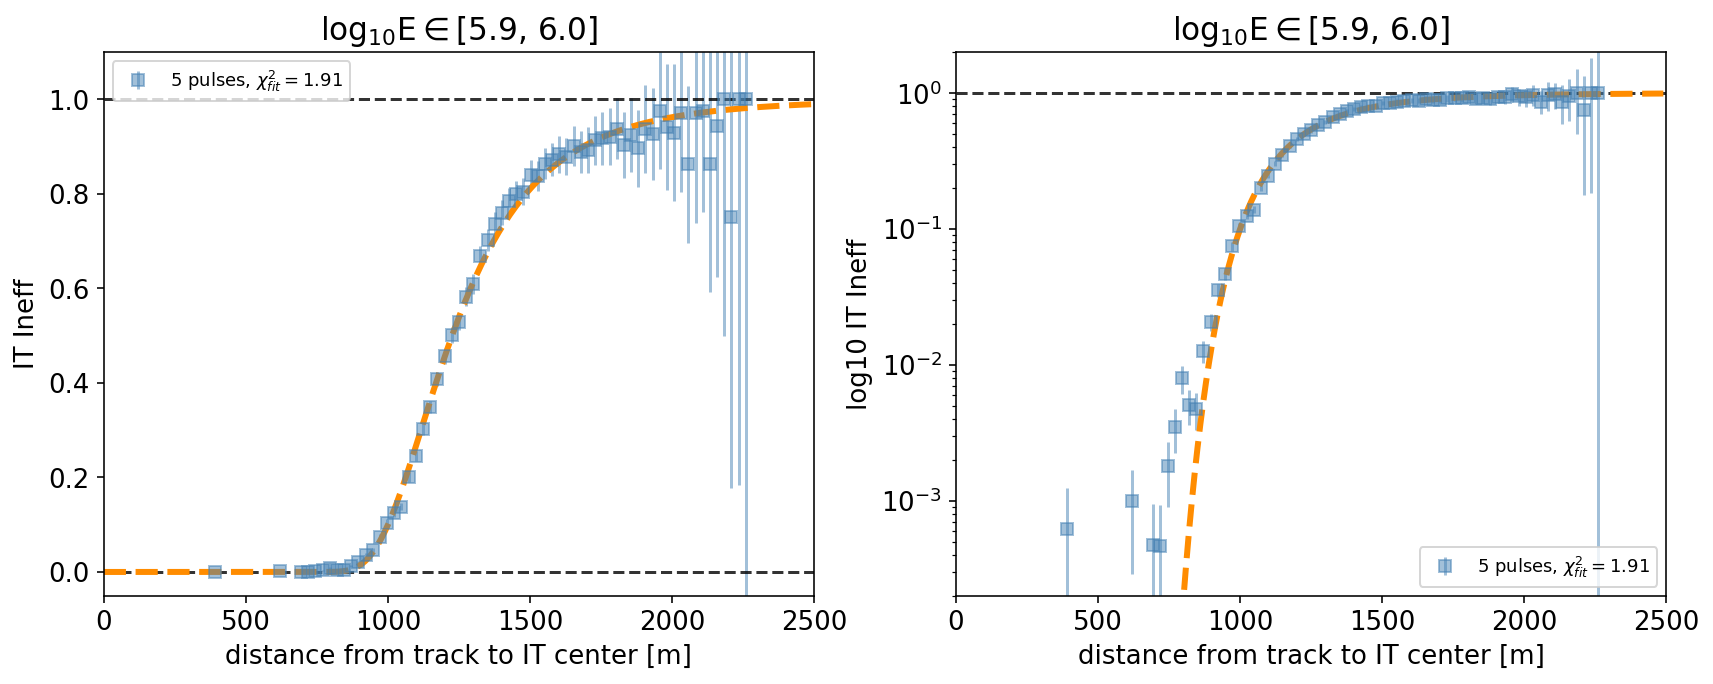

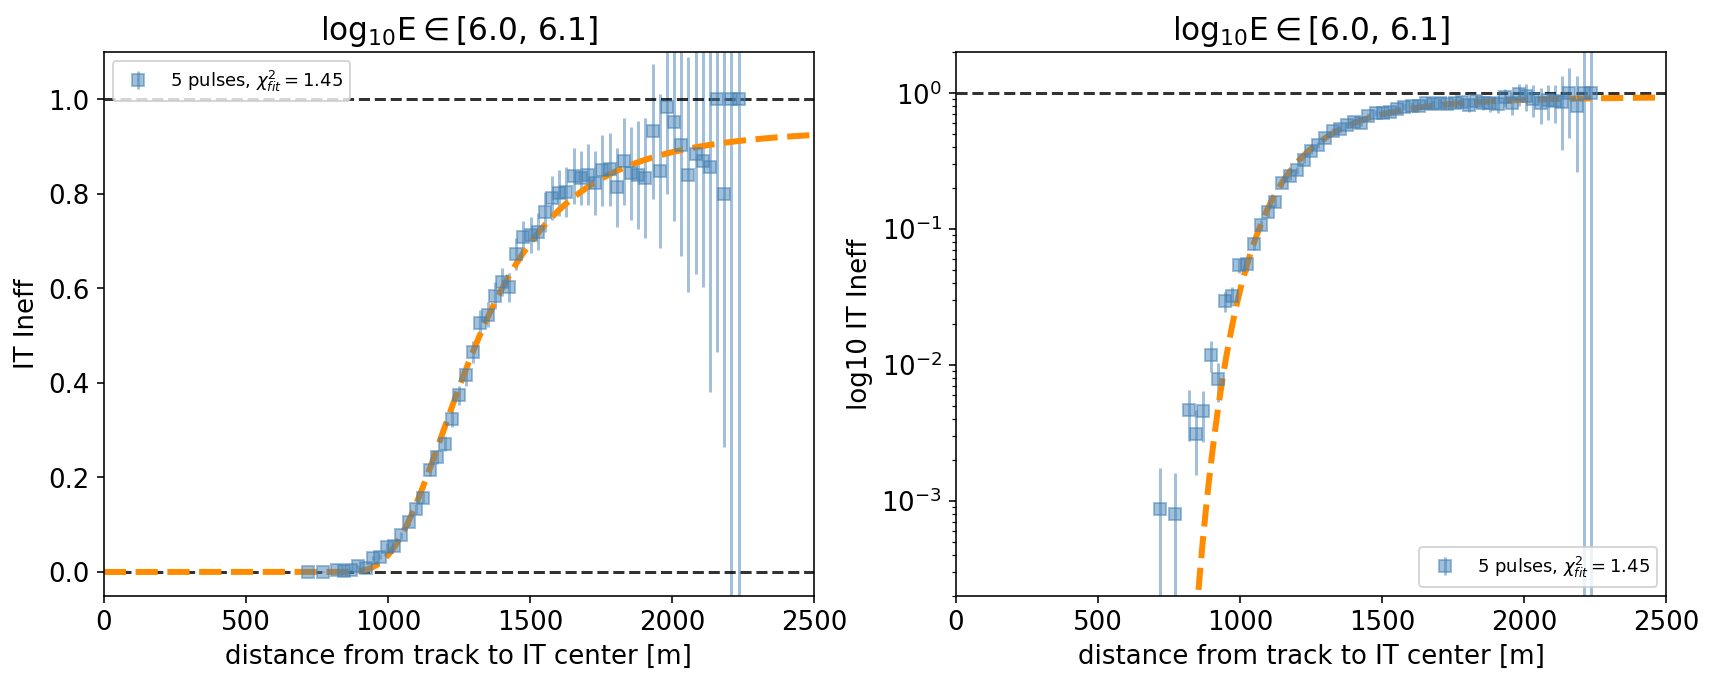

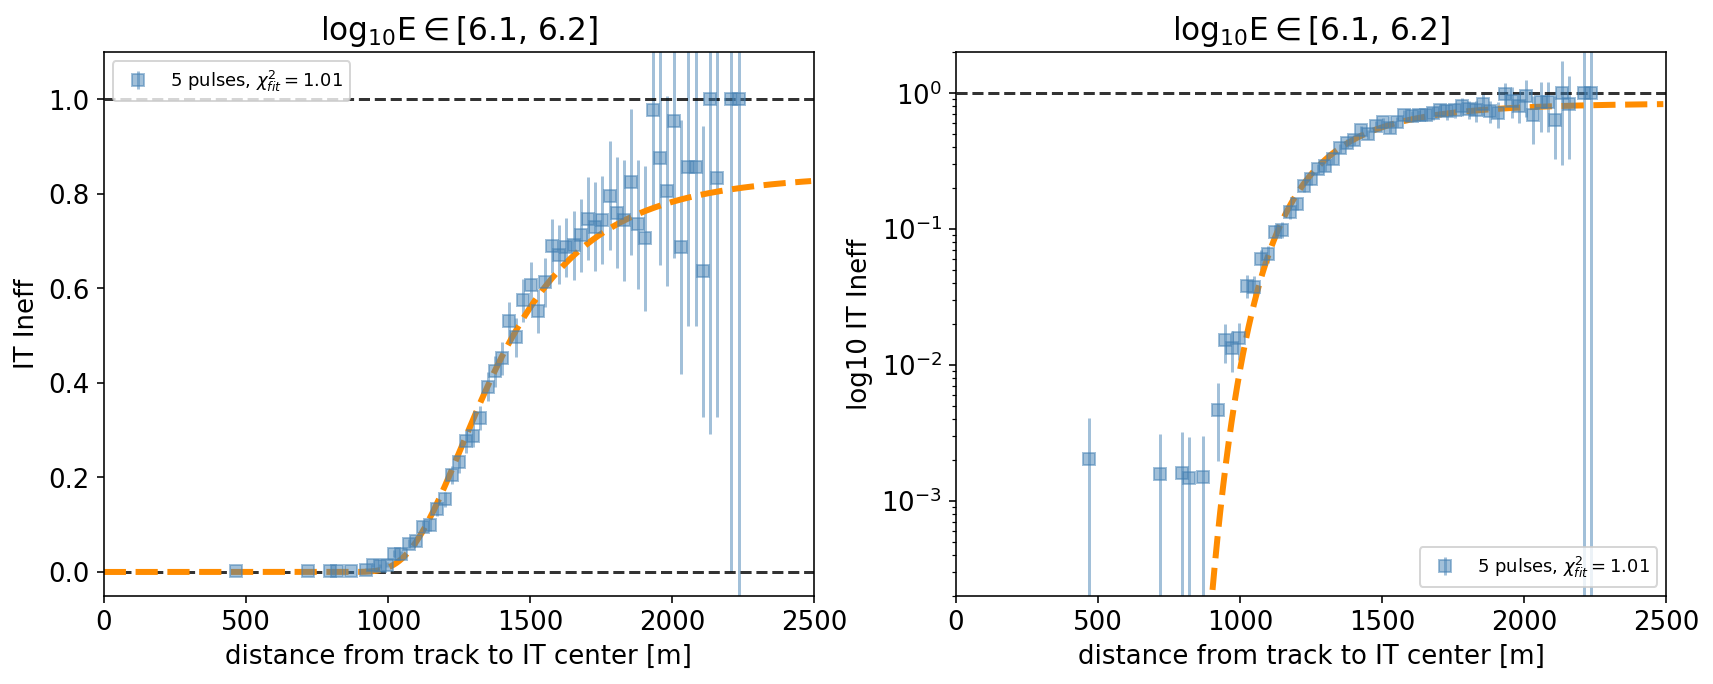

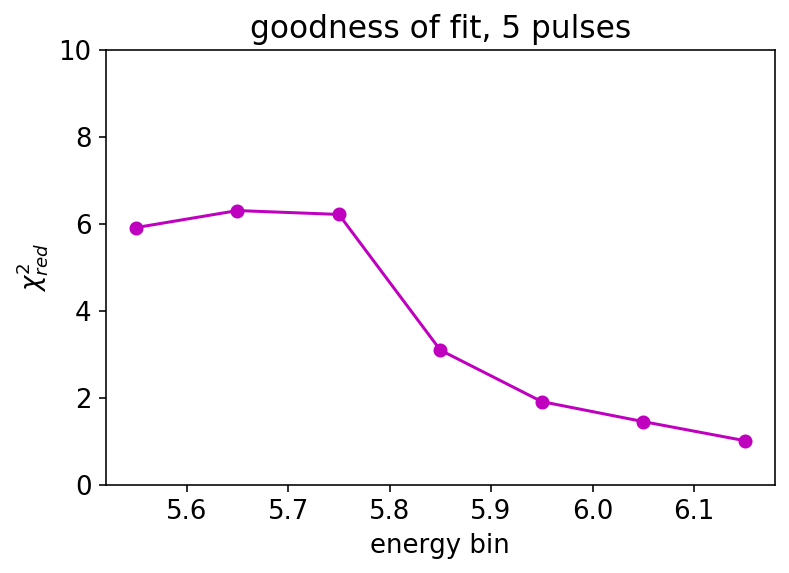

[-0.21464202  5.47        1.01317503]


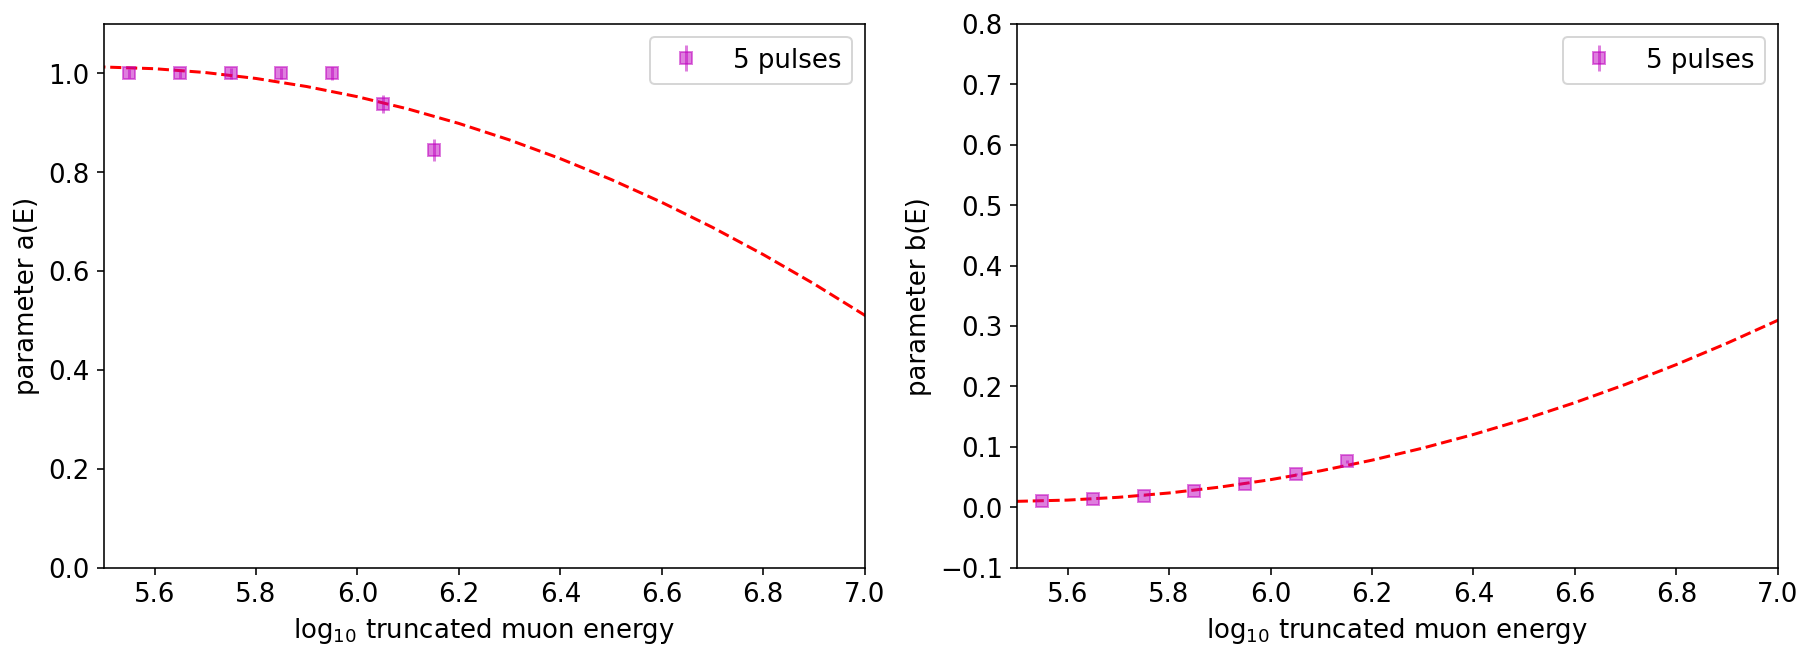

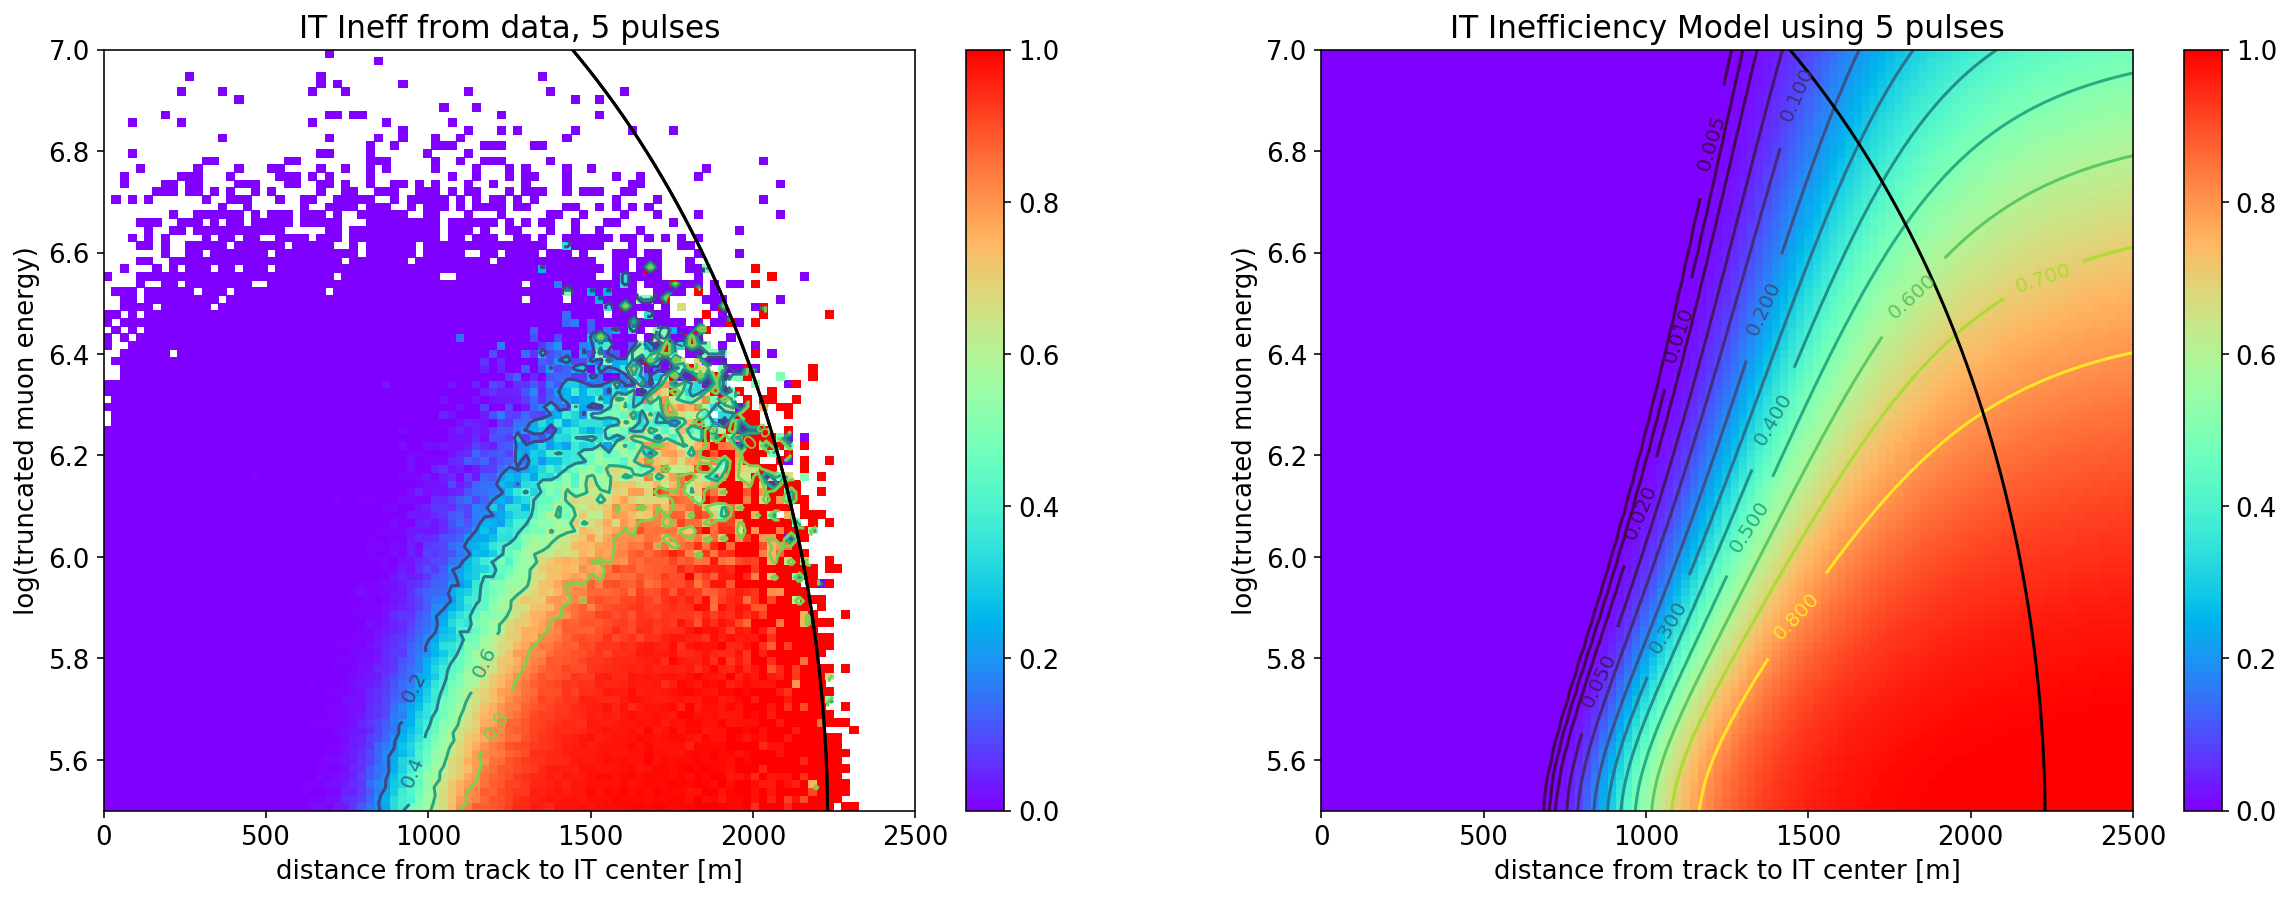

In [13]:
modeling(passed_5,5)